First, install the tabula-py package, works only with java

In [1]:
pip install tabula-py

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests
import os
import urllib.request
import tabula
import numpy as np

Import packages to start handling data

January

It is possible to take the file through the website but because it is new data, I received the files by email.

At the moment it is not possible to access the information via the internet because it has not yet been uploaded and I obtained the data via email

In [3]:
#url = "https://www.iaa.gov.il/media/oril01yl/%D7%93%D7%95%D7%97-%D7%A4%D7%A2%D7%99%D7%9C%D7%95%D7%AA-%D7%97%D7%95%D7%93%D7%A9%D7%99-%D7%A0%D7%AA%D7%91%D7%92-%D7%99%D7%A0%D7%95%D7%90%D7%A8-2022.pdf"
url = "TLV-Airport-Status-January-2022.pdf"

We will take the table we want from the file by page number and convert it to a CSV file

In [4]:
pdf_contry_jan = tabula.read_pdf("TLV-Airport-Status-January-2022.pdf", pages="20-21")
print(len(pdf_contry_jan))
print(pdf_contry_jan)
pdf_contry_jan[0].to_csv("pdf_contry_jan0.csv")
pdf_contry_jan[1].to_csv("pdf_contry_jan1.csv")


4
[      שיעור שיעור.1  נוסעים שיעור.2 נוסעים.1            Unnamed: 0  מדינות
0    השינוי   מסה"כ     NaN   מסה"כ      NaN                   NaN     NaN
1       NaN  23.74%  20,703  15.94%   67,021         UNITED STATES     NaN
2       NaN  19.15%  16,702  12.25%   51,530                TURKEY     NaN
3       NaN   9.50%   8,288   5.93%   24,959                FRANCE     NaN
4       NaN   7.07%   6,170   5.90%   24,835               UKRAINE     NaN
5       NaN   4.92%   4,295   5.37%   22,591               GERMANY     NaN
6   119.65%  11.26%   9,822   5.13%   21,575  UNITED ARAB EMIRATES     NaN
7       NaN   0.26%     235   4.14%   17,421                 ITALY     NaN
8       NaN   0.05%      51   4.03%   16,961               GEORGIA     NaN
9       NaN   4.01%   3,501   3.70%   15,570        UNITED KINGDOM     NaN
10      NaN   1.73%   1,511   3.64%   15,330               AUSTRIA     NaN
11      NaN   3.15%   2,748   3.23%   13,611    RUSSIAN FEDERATION     NaN
12      NaN   0.02%   

We will import the CSV file to enable working with Pandas Dataframe

In [5]:

df0_country = pd.read_csv("pdf_contry_jan0.csv")
df1_country = pd.read_csv("pdf_contry_jan1.csv")

In [6]:
df0_country

,Unnamed: 0,שיעור,שיעור.1,נוסעים,שיעור.2,נוסעים.1,Unnamed: 0.1,מדינות
0,0,השינוי,"מסה""כ",NaN,"מסה""כ",NaN,NaN,NaN
1,1,NaN,23.74%,"20,703",15.94%,"67,021",UNITED STATES,NaN
2,2,NaN,19.15%,"16,702",12.25%,"51,530",TURKEY,NaN
3,3,NaN,9.50%,"8,288",5.93%,"24,959",FRANCE,NaN
4,4,NaN,7.07%,"6,170",5.90%,"24,835",UKRAINE,NaN
5,5,NaN,4.92%,"4,295",5.37%,"22,591",GERMANY,NaN
6,6,119.65%,11.26%,"9,822",5.13%,"21,575",UNITED ARAB EMIRATES,NaN
7,7,NaN,0.26%,235,4.14%,"17,421",ITALY,NaN
8,8,NaN,0.05%,51,4.03%,"16,961",GEORGIA,NaN
9,9,NaN,4.01%,"3,501",3.70%,"15,570",UNITED KINGDOM,NaN


We will rename the columns and lower the columns we do not need

In [7]:
df0_country = df0_country.drop(['מדינות'],axis=1)
df0_country = df0_country.drop(['Unnamed: 0'], axis=1)
df0_country = df0_country.drop(['שיעור'], axis=1)
df0_country = df0_country.iloc[1:]

We will rename the columns and lower the columns we do not need

In [8]:
df0_country = df0_country.rename(columns={'Unnamed: 0.1': 'Country'})
df0_country = df0_country.rename(columns={'נוסעים.1': 'Passengers'})
df0_country = df0_country.rename(columns={'שיעור.2': 'Passengers_P'})
df0_country = df0_country.rename(columns={'נוסעים': 'Passengers Last-Y'})
df0_country = df0_country.rename(columns={'שיעור.1': 'Passengers Last-Y %'})
df0_country

,Passengers Last-Y %,Passengers Last-Y,Passengers_P,Passengers,Country
1,23.74%,"20,703",15.94%,"67,021",UNITED STATES
2,19.15%,"16,702",12.25%,"51,530",TURKEY
3,9.50%,"8,288",5.93%,"24,959",FRANCE
4,7.07%,"6,170",5.90%,"24,835",UKRAINE
5,4.92%,"4,295",5.37%,"22,591",GERMANY
6,11.26%,"9,822",5.13%,"21,575",UNITED ARAB EMIRATES
7,0.26%,235,4.14%,"17,421",ITALY
8,0.05%,51,4.03%,"16,961",GEORGIA
9,4.01%,"3,501",3.70%,"15,570",UNITED KINGDOM
10,1.73%,"1,511",3.64%,"15,330",AUSTRIA


In [9]:
df1_country

,Unnamed: 0,תנועת נוסעים בטיסות בינ''ל\rהתפלגות על פי מדינות לחודש ינואר,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,NaN,ינואר 2021,ינואר 2022,NaN,NaN,NaN
1,1,שיעור\rהשינוי,"שיעור\rמסה""כ",נוסעים,"שיעור\rמסה""כ",נוסעים,מדינות
2,2,30.86%,3.57%,"3,114",0.96%,"4,075",ETHIOPIA
3,3,NaN,0.35%,310,0.96%,"4,066",BELGIUM
4,4,191.36%,1.14%,996,0.69%,"2,902",MOLDOVA
5,5,NaN,0.23%,202,0.60%,"2,524",JORDAN
6,6,NaN,0.64%,565,0.45%,"1,910",BELARUS
7,7,135.09%,0.78%,681,0.38%,"1,601",INDIA
8,8,62.96%,1.02%,891,0.34%,"1,452",CANADA
9,9,NaN,0.09%,80,0.34%,"1,439",EGYPT


The cleaning and removal phase of the rows and columns is done for each table we import from the file and finally we merge the tables into a consolidated dataframe of that month

In [10]:
df1_country = df1_country.iloc[2:]
df1_country = df1_country.drop(['Unnamed: 0'], axis=1)
df1_country = df1_country.rename(columns={'Unnamed: 4': 'Country'})
df1_country = df1_country.rename(columns={'Unnamed: 3': 'Passengers'})
df1_country = df1_country.rename(columns={'Unnamed: 2': 'Passengers_P'})
df1_country = df1_country.rename(columns={'Unnamed: 1': 'Passengers Last-Y'})
df1_country = df1_country.rename(columns={'Unnamed: 0.1': 'Passengers Last-Y %'})
df1_country = df1_country.drop(df1_country.iloc[:, [0, 0]], axis=1)
df1_country

,Passengers Last-Y %,Passengers Last-Y,Passengers_P,Passengers,Country
2,3.57%,"3,114",0.96%,"4,075",ETHIOPIA
3,0.35%,310,0.96%,"4,066",BELGIUM
4,1.14%,996,0.69%,"2,902",MOLDOVA
5,0.23%,202,0.60%,"2,524",JORDAN
6,0.64%,565,0.45%,"1,910",BELARUS
7,0.78%,681,0.38%,"1,601",INDIA
8,1.02%,891,0.34%,"1,452",CANADA
9,0.09%,80,0.34%,"1,439",EGYPT
10,NaN,NaN,0.31%,"1,338",LITHUANIA
11,NaN,5,0.28%,"1,196",PORTUGAL


Here is the consolidation of all the tables relevant to the countries in that month

In [11]:
df_country = pd.concat([df0_country,df1_country])
df_country

,Passengers Last-Y %,Passengers Last-Y,Passengers_P,Passengers,Country
1,23.74%,"20,703",15.94%,"67,021",UNITED STATES
2,19.15%,"16,702",12.25%,"51,530",TURKEY
3,9.50%,"8,288",5.93%,"24,959",FRANCE
4,7.07%,"6,170",5.90%,"24,835",UKRAINE
5,4.92%,"4,295",5.37%,"22,591",GERMANY
6,11.26%,"9,822",5.13%,"21,575",UNITED ARAB EMIRATES
7,0.26%,235,4.14%,"17,421",ITALY
8,0.05%,51,4.03%,"16,961",GEORGIA
9,4.01%,"3,501",3.70%,"15,570",UNITED KINGDOM
10,1.73%,"1,511",3.64%,"15,330",AUSTRIA


Just as we did a treatment for the table of countries, so we did for the table of companies

In [12]:
pdf_company_jan = tabula.read_pdf("TLV-Airport-Status-January-2022.pdf", pages="16-18")
print(len(pdf_company_jan))
print(pdf_company_jan)
pdf_company_jan[0].to_csv("pdf_company_jan0.csv")
pdf_company_jan[1].to_csv("pdf_company_jan1.csv")
pdf_company_jan[2].to_csv("pdf_company_jan2.csv")
pdf_company_jan[3].to_csv("pdf_company_jan3.csv")
pdf_company_jan[4].to_csv("pdf_company_jan4.csv")

7
[      שיעור שיעור.1  נוסעים שיעור.2 נוסעים.1                חברת תעופה  \
0    השינוי   מסה"כ     NaN   מסה"כ      NaN                       NaN   
1       NaN  20.09%  17,524  21.30%   89,575     EL AL ISRAEL AIRLINES   
2       NaN   0.90%     791  10.03%   42,204                   RYANAIR   
3   191.07%  11.23%   9,793   6.77%   28,505          TURKISH AIRLINES   
4   118.61%  13.36%  11,651   6.05%   25,471           UNITED AIRLINES   
5       NaN   7.86%   6,854   5.26%   22,144          PEGASUS AIRLINES   
6       NaN   0.71%     623   4.59%   19,310                   WIZZAIR   
7       NaN   2.59%   2,263   4.10%   17,246           ISRAIR AIRLINES   
8       NaN   4.59%   4,007   3.88%   16,334         UKRAINE INTL  AIR   
9       NaN   3.92%   3,419   3.68%   15,489                 LUFTHANSA   
10  139.03%   5.67%   4,947   2.81%   11,825                  FLYDUBAI   
11      NaN   0.86%     754   2.77%   11,677                   EASYJET   
12      NaN     NaN     NaN   2.65%

In [13]:
df0_company = pd.read_csv("pdf_company_jan0.csv")
df1_company = pd.read_csv("pdf_company_jan1.csv")
df2_company = pd.read_csv("pdf_company_jan4.csv")
df0_company

,Unnamed: 0,שיעור,שיעור.1,נוסעים,שיעור.2,נוסעים.1,חברת תעופה,Unnamed: 0.1
0,0,השינוי,"מסה""כ",NaN,"מסה""כ",NaN,NaN,NaN
1,1,NaN,20.09%,"17,524",21.30%,"89,575",EL AL ISRAEL AIRLINES,LY
2,2,NaN,0.90%,791,10.03%,"42,204",RYANAIR,FR
3,3,191.07%,11.23%,"9,793",6.77%,"28,505",TURKISH AIRLINES,TK
4,4,118.61%,13.36%,"11,651",6.05%,"25,471",UNITED AIRLINES,UA
5,5,NaN,7.86%,"6,854",5.26%,"22,144",PEGASUS AIRLINES,PC
6,6,NaN,0.71%,623,4.59%,"19,310",WIZZAIR,W6
7,7,NaN,2.59%,"2,263",4.10%,"17,246",ISRAIR AIRLINES,6H
8,8,NaN,4.59%,"4,007",3.88%,"16,334",UKRAINE INTL AIR,PS
9,9,NaN,3.92%,"3,419",3.68%,"15,489",LUFTHANSA,LH


In [14]:
df0_company = df0_company.drop(['Unnamed: 0.1'],axis=1)
df0_company = df0_company.drop(['Unnamed: 0'],axis=1)
df0_company = df0_company.iloc[1:]
df0_company = df0_company.rename(columns={'חברת תעופה': 'Company'})
df0_company = df0_company.rename(columns={'נוסעים.1': 'Passengers'})
df0_company = df0_company.rename(columns={'שיעור.2': 'Passengers_P'})
df0_company = df0_company.rename(columns={'נוסעים': 'Passengers Last-Y'})
df0_company = df0_company.rename(columns={'שיעור.1': 'Passengers % Last-Y'})
df0_company = df0_company.rename(columns={'שיעור': 'Change %'})
df0_company = df0_company.drop(['Passengers Last-Y'],axis=1)
df0_company = df0_company.drop(['Passengers % Last-Y'],axis=1)
df0_company = df0_company.drop(['Change %'],axis=1)
df0_company = df0_company.drop([15,16,17])
df0_company['Company'] = df0_company['Company'].str.replace('NaN','AEROFLOT RUSSIAN')
df0_company

,Passengers_P,Passengers,Company
1,21.30%,"89,575",EL AL ISRAEL AIRLINES
2,10.03%,"42,204",RYANAIR
3,6.77%,"28,505",TURKISH AIRLINES
4,6.05%,"25,471",UNITED AIRLINES
5,5.26%,"22,144",PEGASUS AIRLINES
6,4.59%,"19,310",WIZZAIR
7,4.10%,"17,246",ISRAIR AIRLINES
8,3.88%,"16,334",UKRAINE INTL AIR
9,3.68%,"15,489",LUFTHANSA
10,2.81%,"11,825",FLYDUBAI


In [15]:
df1_company = df1_company.drop(['Unnamed: 5'],axis=1)
df1_company = df1_company.drop(['Unnamed: 0.1'],axis=1)
df1_company = df1_company.drop(['Unnamed: 1'],axis=1)
df1_company = df1_company.drop(df1_company.iloc[:, [0, 0]], axis=1)
df1_company = df1_company.rename(columns={'Unnamed: 4': 'Company'})
df1_company = df1_company.rename(columns={'Unnamed: 3': 'Passengers'})
df1_company = df1_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df1_company = df1_company.iloc[2:]
df1_company = df1_company.drop(df1_company.iloc[:, [0, 0]], axis=1)
df1_company

,Passengers_P,Passengers,Company
2,0.95%,"4,028",AEGEAN AIRLINES
3,0.95%,"4,018",SMARTWINGS
4,0.84%,"3,549",SKYUP AIRLINES
5,0.83%,"3,501",AUSTRIAN AIRLINES
6,0.82%,"3,477",IBERIA
7,0.74%,"3,143",LOT POLISH AIRLINES
8,0.65%,"2,748",AIR EUROPA Lineas\rAereas
9,0.58%,"2,454",ROYAL JORDANIAN
10,0.51%,"2,172",AIR MOLDOVA
11,0.46%,"1,967",TUS AIRWAYS


In [16]:
df2_company

,Unnamed: 0,תנועת נוסעים מצטברת בטיסות בינ''ל\rהתפלגות על פי חברות תעופה,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,מצטבר 2021,מצטבר 2022,NaN,NaN,NaN,NaN
1,1,שיעור\rהשינוי,"שיעור\rמסה""כ",נוסעים,"שיעור\rמסה""כ",נוסעים,חברת תעופה,NaN
2,2,NaN,NaN,NaN,0.19%,822,TRANSAVIA,HV
3,3,NaN,NaN,NaN,0.18%,775,BRUSSELS AIRLINES,SN
4,4,NaN,NaN,NaN,0.17%,741,GULF AIR - BAHREIN,GF
5,5,NaN,NaN,NaN,0.17%,728,FLYONE,5F
6,6,NaN,NaN,NaN,0.15%,664,ITALIA TRASPORTO\rAEREO,AZ
7,7,NaN,NaN,NaN,0.15%,652,ROSSIYA AIRLINES,FV
8,8,NaN,NaN,NaN,0.12%,546,NORD WIND,N4
9,9,NaN,NaN,NaN,0.07%,334,VUELING AIRLINES S.A.,VY


In [17]:
df2_company = df2_company.iloc[2:]
df2_company = df2_company.drop(['Unnamed: 5'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0'],axis=1)
df2_company = df2_company.drop(df2_company.iloc[:, [0, 0]], axis=1)
df2_company = df2_company.rename(columns={'Unnamed: 3': 'Passengers'})
df2_company = df2_company.rename(columns={'Unnamed: 4': 'Company'})
df2_company = df2_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df2_company = df2_company.drop(['Unnamed: 1'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0.1'],axis=1)
df2_company

,Passengers_P,Passengers,Company
2,0.19%,822,TRANSAVIA
3,0.18%,775,BRUSSELS AIRLINES
4,0.17%,741,GULF AIR - BAHREIN
5,0.17%,728,FLYONE
6,0.15%,664,ITALIA TRASPORTO\rAEREO
7,0.15%,652,ROSSIYA AIRLINES
8,0.12%,546,NORD WIND
9,0.07%,334,VUELING AIRLINES S.A.
10,0.07%,318,BLUE BIRD AIRWAYS
11,0.07%,303,AIR SEYCHELLES


In [18]:
df_company = pd.concat([df0_company,df1_company,df2_company])
df_company

,Passengers_P,Passengers,Company
1,21.30%,"89,575",EL AL ISRAEL AIRLINES
2,10.03%,"42,204",RYANAIR
3,6.77%,"28,505",TURKISH AIRLINES
4,6.05%,"25,471",UNITED AIRLINES
5,5.26%,"22,144",PEGASUS AIRLINES
6,4.59%,"19,310",WIZZAIR
7,4.10%,"17,246",ISRAIR AIRLINES
8,3.88%,"16,334",UKRAINE INTL AIR
9,3.68%,"15,489",LUFTHANSA
10,2.81%,"11,825",FLYDUBAI


In [19]:
df_country.to_csv('final_country_jan.csv')
df_company.to_csv('final_company_jan.csv')

February

We will perform the process we performed for January also for February, March and April

Because each table comes with a different number of rows and columns both in terms of quantity and name so each table gets a different treatment

In [20]:
pdf_contry_feb = tabula.read_pdf("TLV-Airport-Status-February-2022.pdf", pages="23-26")
print(len(pdf_contry_feb))
print(pdf_contry_feb)
pdf_contry_feb[0].to_csv("pdf_contry_feb0.csv")
pdf_contry_feb[3].to_csv("pdf_contry_feb1.csv")

Got stderr: Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:40 PM org.apache.pdfbox.pdmodel.f

9
[    '' Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3            Unnamed: 4
0  NaN       2021       2022        NaN        NaN                   NaN
1  NaN          "        NaN          "        NaN                   NaN
2  NaN     24.11%     26,999     14.09%    158,042         UNITED STATES
3  NaN     15.86%     17,759     13.32%    149,410                TURKEY
4  NaN      7.84%      8,787      7.47%     83,809                FRANCE
5  NaN      8.98%     10,063      6.80%     76,280  UNITED ARAB EMIRATES
6  NaN     13.07%     14,636      5.95%     66,801               GERMANY
7  NaN      0.36%        412      5.19%     58,295                 ITALY
8  NaN      3.40%      3,808      5.05%     56,639        UNITED KINGDOM
9  NaN      6.34%      7,104      3.54%     39,742               UKRAINE
10 NaN      0.16%        186      3.30%     37,087               GEORGIA
11 NaN      0.59%        668      3.15%     35,415           SWITZERLAND
12 NaN      1.35%      1,516      2.98%     33,5

In [21]:
df0_country = pd.read_csv("pdf_contry_feb0.csv")
df1_country = pd.read_csv("pdf_contry_feb1.csv")
df0_country

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,NaN,2021,2022,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN
2,2,NaN,24.11%,"26,999",14.09%,"158,042",UNITED STATES
3,3,NaN,15.86%,"17,759",13.32%,"149,410",TURKEY
4,4,NaN,7.84%,"8,787",7.47%,"83,809",FRANCE
5,5,NaN,8.98%,"10,063",6.80%,"76,280",UNITED ARAB EMIRATES
6,6,NaN,13.07%,"14,636",5.95%,"66,801",GERMANY
7,7,NaN,0.36%,412,5.19%,"58,295",ITALY
8,8,NaN,3.40%,"3,808",5.05%,"56,639",UNITED KINGDOM
9,9,NaN,6.34%,"7,104",3.54%,"39,742",UKRAINE


In [22]:
df0_country = df0_country.drop(['Unnamed: 0'], axis=1)
df0_country = df0_country.drop(['Unnamed: 0.1'], axis=1)
df0_country = df0_country.drop(['Unnamed: 1'], axis=1)
df0_country = df0_country.drop(df0_country.iloc[:, [0, 0]], axis=1)
df0_country = df0_country.iloc[2:]
df0_country = df0_country.rename(columns={'Unnamed: 4': 'Country'})
df0_country = df0_country.rename(columns={'Unnamed: 3': 'Passengers'})
df0_country = df0_country.rename(columns={'Unnamed: 2': 'Passengers_P'})

In [23]:
df0_country

,Passengers_P,Passengers,Country
2,14.09%,"158,042",UNITED STATES
3,13.32%,"149,410",TURKEY
4,7.47%,"83,809",FRANCE
5,6.80%,"76,280",UNITED ARAB EMIRATES
6,5.95%,"66,801",GERMANY
7,5.19%,"58,295",ITALY
8,5.05%,"56,639",UNITED KINGDOM
9,3.54%,"39,742",UKRAINE
10,3.30%,"37,087",GEORGIA
11,3.15%,"35,415",SWITZERLAND


In [24]:
df1_country

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,NaN,2021,2022,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN
2,2,NaN,0.31%,348,0.90%,"10,100",BELGIUM
3,3,148.37%,3.54%,"3,965",0.87%,"9,848",ETHIOPIA
4,4,NaN,1.13%,"1,269",0.41%,"4,668",MOLDOVA
5,5,NaN,NaN,11,0.34%,"3,863",PORTUGAL
6,6,NaN,NaN,NaN,0.32%,"3,699",FINLAND
7,7,NaN,0.28%,315,0.32%,"3,654",JORDAN
8,8,NaN,0.92%,"1,037",0.28%,"3,209",INDIA
9,9,NaN,0.80%,906,0.28%,"3,197",CANADA


In [25]:
df1_country = df1_country.drop(['Unnamed: 0'], axis=1)
df1_country = df1_country.drop(['Unnamed: 0.1'], axis=1)
df1_country = df1_country.drop(['Unnamed: 1'], axis=1)
df1_country = df1_country.drop(df1_country.iloc[:, [0, 0]], axis=1)
df1_country = df1_country.iloc[2:]
df1_country = df1_country.rename(columns={'Unnamed: 4': 'Country'})
df1_country = df1_country.rename(columns={'Unnamed: 3': 'Passengers'})
df1_country = df1_country.rename(columns={'Unnamed: 2': 'Passengers_P'})

In [26]:
df1_country

,Passengers_P,Passengers,Country
2,0.90%,"10,100",BELGIUM
3,0.87%,"9,848",ETHIOPIA
4,0.41%,"4,668",MOLDOVA
5,0.34%,"3,863",PORTUGAL
6,0.32%,"3,699",FINLAND
7,0.32%,"3,654",JORDAN
8,0.28%,"3,209",INDIA
9,0.28%,"3,197",CANADA
10,0.28%,"3,177",LITHUANIA
11,0.27%,"3,128",BELARUS


In [27]:
df_country = pd.concat([df0_country,df1_country])
df_country

,Passengers_P,Passengers,Country
2,14.09%,"158,042",UNITED STATES
3,13.32%,"149,410",TURKEY
4,7.47%,"83,809",FRANCE
5,6.80%,"76,280",UNITED ARAB EMIRATES
6,5.95%,"66,801",GERMANY
7,5.19%,"58,295",ITALY
8,5.05%,"56,639",UNITED KINGDOM
9,3.54%,"39,742",UKRAINE
10,3.30%,"37,087",GEORGIA
11,3.15%,"35,415",SWITZERLAND


In [28]:
pdf_company_feb = tabula.read_pdf("TLV-Airport-Status-February-2022.pdf", pages="16-19")
print(len(pdf_company_feb))
print(pdf_company_feb)
pdf_company_feb[0].to_csv("pdf_company_feb0.csv")
pdf_company_feb[3].to_csv("pdf_company_feb1.csv")
pdf_company_feb[6].to_csv("pdf_company_feb2.csv")

Got stderr: Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:43 PM org.apache.pdfbox.pdmodel.f

12
[    '' Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0  NaN       2021       2022        NaN        NaN   
1  NaN          "        NaN          "        NaN   
2  NaN     22.51%     25,201     20.71%    232,229   
3  NaN      0.70%        791     11.15%    125,106   
4  NaN      8.74%      9,793      7.32%     82,150   
5  NaN      6.28%      7,037      5.63%     63,171   
6  NaN      0.67%        754      5.43%     60,888   
7  NaN     11.36%     12,727      4.82%     54,107   
8  NaN      9.96%     11,156      3.93%     44,143   
9  NaN      4.06%      4,549      3.80%     42,706   
10 NaN      0.55%        623      3.76%     42,162   
11 NaN      4.41%      4,947      3.32%     37,307   
12 NaN        NaN        NaN      2.42%     27,161   
13 NaN      3.57%      4,007      2.41%     27,100   
14 NaN      4.87%      5,463      1.99%     22,415   
15 NaN      1.72%      1,931      1.81%     20,383   
16 NaN      2.19%      2,455      1.58%     17,738   
17 NaN      1.63%      1

In [29]:
df0_company = pd.read_csv('pdf_company_feb0.csv')
df1_company = pd.read_csv('pdf_company_feb1.csv')
df2_company = pd.read_csv('pdf_company_feb2.csv')

In [30]:
df0_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,NaN,22.51%,"25,201",20.71%,"232,229",EL AL ISRAEL AIRLINES,LY
3,3,NaN,0.70%,791,11.15%,"125,106",RYANAIR,FR
4,4,NaN,8.74%,"9,793",7.32%,"82,150",TURKISH AIRLINES,TK
5,5,NaN,6.28%,"7,037",5.63%,"63,171",PEGASUS AIRLINES,PC
6,6,NaN,0.67%,754,5.43%,"60,888",EASYJET,EZY
7,7,NaN,11.36%,"12,727",4.82%,"54,107",UNITED AIRLINES,UA
8,8,NaN,9.96%,"11,156",3.93%,"44,143",ISRAIR AIRLINES,6H
9,9,NaN,4.06%,"4,549",3.80%,"42,706",LUFTHANSA,LH


In [31]:
df0_company = df0_company.drop(['Unnamed: 5'],axis=1)
df0_company = df0_company.drop(['Unnamed: 0'],axis=1)
df0_company = df0_company.drop(['Unnamed: 0.1'],axis=1)
df0_company = df0_company.drop(['Unnamed: 1'],axis=1)
df0_company = df0_company.iloc[2:]
df0_company = df0_company.drop(df0_company.iloc[:, [0, 0]], axis=1)
df0_company = df0_company.rename(columns={'Unnamed: 4': 'Company'})
df0_company = df0_company.rename(columns={'Unnamed: 3': 'Passengers'})
df0_company = df0_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df0_company

,Passengers_P,Passengers,Company
2,20.71%,"232,229",EL AL ISRAEL AIRLINES
3,11.15%,"125,106",RYANAIR
4,7.32%,"82,150",TURKISH AIRLINES
5,5.63%,"63,171",PEGASUS AIRLINES
6,5.43%,"60,888",EASYJET
7,4.82%,"54,107",UNITED AIRLINES
8,3.93%,"44,143",ISRAIR AIRLINES
9,3.80%,"42,706",LUFTHANSA
10,3.76%,"42,162",WIZZAIR
11,3.32%,"37,307",FLYDUBAI


In [32]:
df1_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,155.01%,3.44%,"3,857",0.87%,"9,836",ETHIOPIAN AIRLINES,ET
3,3,NaN,NaN,NaN,0.81%,"9,155",GEORGIAN AIRWAYS,A9
4,4,NaN,NaN,NaN,0.72%,"8,089",LOT POLISH AIRLINES,LO
5,5,NaN,1.12%,"1,259",0.71%,"7,965",AUSTRIAN AIRLINES,OS
6,6,NaN,NaN,NaN,0.68%,"7,668",BRITISH AIRWAYS PLC,BA
7,7,NaN,NaN,NaN,0.66%,"7,443",SMARTWINGS,QS
8,8,NaN,0.32%,362,0.65%,"7,359",AIR EUROPA Lineas\rAereas,UX
9,9,NaN,NaN,NaN,0.50%,"5,622",TUS AIRWAYS,U8


In [33]:
df1_company = df1_company.drop(['Unnamed: 5'],axis=1)
df1_company = df1_company.drop(['Unnamed: 0'],axis=1)
df1_company = df1_company.drop(['Unnamed: 0.1'],axis=1)
df1_company = df1_company.drop(['Unnamed: 1'],axis=1)
df1_company = df1_company.iloc[2:]
df1_company = df1_company.drop(df1_company.iloc[:, [0, 0]], axis=1)
df1_company = df1_company.rename(columns={'Unnamed: 4': 'Company'})
df1_company = df1_company.rename(columns={'Unnamed: 3': 'Passengers'})
df1_company = df1_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df1_company

,Passengers_P,Passengers,Company
2,0.87%,"9,836",ETHIOPIAN AIRLINES
3,0.81%,"9,155",GEORGIAN AIRWAYS
4,0.72%,"8,089",LOT POLISH AIRLINES
5,0.71%,"7,965",AUSTRIAN AIRLINES
6,0.68%,"7,668",BRITISH AIRWAYS PLC
7,0.66%,"7,443",SMARTWINGS
8,0.65%,"7,359",AIR EUROPA Lineas\rAereas
9,0.50%,"5,622",TUS AIRWAYS
10,0.49%,"5,590",ETIHAD AIRWAYS
11,0.48%,"5,460",SKYUP AIRLINES


In [34]:
df2_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,0.20%,"2,317",ITALIA TRASPORTO\rAEREO,NaN,AZ
3,3,NaN,NaN,NaN,0.18%,"2,123",CORONDON AIRLINES,NaN,XC
4,4,NaN,NaN,NaN,0.16%,"1,886",UZBEKISTAN AIR,NaN,HY
5,5,NaN,NaN,NaN,0.15%,"1,764",GULF AIR - BAHREIN,NaN,GF
6,6,NaN,NaN,NaN,0.15%,"1,701",AZERBAIJAN AIRLINES,NaN,J2
7,7,NaN,NaN,NaN,0.12%,"1,371",ROSSIYA AIRLINES,NaN,FV
8,8,NaN,NaN,NaN,0.11%,"1,266",FINNAIR,NaN,AY
9,9,NaN,NaN,NaN,0.10%,"1,215",FLYONE,NaN,5F


In [35]:
df2_company = df2_company.drop(['Unnamed: 5'],axis=1)
df2_company = df2_company.drop(['Unnamed: 6'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0.1'],axis=1)
df2_company = df2_company.drop(['Unnamed: 1'],axis=1)
df2_company = df2_company.iloc[2:]
df2_company = df2_company.drop(df2_company.iloc[:, [0, 0]], axis=1)
df2_company = df2_company.rename(columns={'Unnamed: 4': 'Company'})
df2_company = df2_company.rename(columns={'Unnamed: 3': 'Passengers'})
df2_company = df2_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df2_company

,Passengers_P,Passengers,Company
2,0.20%,"2,317",ITALIA TRASPORTO\rAEREO
3,0.18%,"2,123",CORONDON AIRLINES
4,0.16%,"1,886",UZBEKISTAN AIR
5,0.15%,"1,764",GULF AIR - BAHREIN
6,0.15%,"1,701",AZERBAIJAN AIRLINES
7,0.12%,"1,371",ROSSIYA AIRLINES
8,0.11%,"1,266",FINNAIR
9,0.10%,"1,215",FLYONE
10,0.10%,"1,205",AIR PORTUGAL
11,0.10%,"1,130",AIR SEYCHELLES


In [36]:
df2_company

,Passengers_P,Passengers,Company
2,0.20%,"2,317",ITALIA TRASPORTO\rAEREO
3,0.18%,"2,123",CORONDON AIRLINES
4,0.16%,"1,886",UZBEKISTAN AIR
5,0.15%,"1,764",GULF AIR - BAHREIN
6,0.15%,"1,701",AZERBAIJAN AIRLINES
7,0.12%,"1,371",ROSSIYA AIRLINES
8,0.11%,"1,266",FINNAIR
9,0.10%,"1,215",FLYONE
10,0.10%,"1,205",AIR PORTUGAL
11,0.10%,"1,130",AIR SEYCHELLES


In [37]:
df_company = pd.concat([df0_company,df1_company,df2_company])
df_company

,Passengers_P,Passengers,Company
2,20.71%,"232,229",EL AL ISRAEL AIRLINES
3,11.15%,"125,106",RYANAIR
4,7.32%,"82,150",TURKISH AIRLINES
5,5.63%,"63,171",PEGASUS AIRLINES
6,5.43%,"60,888",EASYJET
...,...,...,...
18,0.02%,271,AIR BALTIC
19,0.01%,199,USA AIR FORCE
20,NaN,110,WIND ROSE AVIATION Co.\rLt
21,NaN,100,CZECH A/F


In [38]:
df_country.to_csv('final_country_feb.csv')
df_company.to_csv('final_company_feb.csv')

March

In [39]:
pdf_country_mrch = tabula.read_pdf("TLV-Airport-Status-March-2022.pdf", pages="22-24")
print(len(pdf_country_mrch))
print(pdf_country_mrch)
pdf_country_mrch[0].to_csv("pdf_country_mrch0.csv")
pdf_country_mrch[1].to_csv("pdf_country_mrch1.csv")
pdf_country_mrch[2].to_csv("pdf_country_mrch2.csv")

Got stderr: Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:46 PM org.apache.pdfbox.pdmodel.f

5
[   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3            Unnamed: 4
0           "        NaN          "        NaN                   NaN
1      10.36%     13,816     12.58%    152,909                TURKEY
2      27.59%     36,784     11.43%    138,965         UNITED STATES
3      10.40%     13,872      8.56%    103,996                FRANCE
4       2.91%      3,884      7.06%     85,812  UNITED ARAB EMIRATES
5       0.44%        595      6.99%     85,024                 ITALY
6      12.35%     16,470      6.54%     79,496               GERMANY
7       6.19%      8,264      5.95%     72,279        UNITED KINGDOM
8       0.54%        731      3.22%     39,124           SWITZERLAND
9       0.51%        693      3.19%     38,838                 SPAIN
10      0.40%        536      3.09%     37,591               HUNGARY
11      0.51%        689      2.96%     35,988                GREECE
12      0.78%      1,045      2.91%     35,361               AUSTRIA
13      0.90%      1,203      2

In [40]:
df0_country = pd.read_csv("pdf_country_mrch0.csv")
df1_country = pd.read_csv("pdf_country_mrch1.csv")
df2_country = pd.read_csv("pdf_country_mrch2.csv")
df0_country

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"""",NaN,"""",NaN,NaN
1,1,10.36%,"13,816",12.58%,"152,909",TURKEY
2,2,27.59%,"36,784",11.43%,"138,965",UNITED STATES
3,3,10.40%,"13,872",8.56%,"103,996",FRANCE
4,4,2.91%,"3,884",7.06%,"85,812",UNITED ARAB EMIRATES
5,5,0.44%,595,6.99%,"85,024",ITALY
6,6,12.35%,"16,470",6.54%,"79,496",GERMANY
7,7,6.19%,"8,264",5.95%,"72,279",UNITED KINGDOM
8,8,0.54%,731,3.22%,"39,124",SWITZERLAND
9,9,0.51%,693,3.19%,"38,838",SPAIN


In [41]:
df0_country = df0_country.drop(['Unnamed: 0'], axis=1)
df0_country = df0_country.drop(['Unnamed: 0.1'], axis=1)
df0_country = df0_country.drop(['Unnamed: 1'], axis=1)
df0_country = df0_country.iloc[1:]
df0_country = df0_country.rename(columns={'Unnamed: 4': 'Country'})
df0_country = df0_country.rename(columns={'Unnamed: 3': 'Passengers'})
df0_country = df0_country.rename(columns={'Unnamed: 2': 'Passengers_P'})
df0_country

,Passengers_P,Passengers,Country
1,12.58%,"152,909",TURKEY
2,11.43%,"138,965",UNITED STATES
3,8.56%,"103,996",FRANCE
4,7.06%,"85,812",UNITED ARAB EMIRATES
5,6.99%,"85,024",ITALY
6,6.54%,"79,496",GERMANY
7,5.95%,"72,279",UNITED KINGDOM
8,3.22%,"39,124",SWITZERLAND
9,3.19%,"38,838",SPAIN
10,3.09%,"37,591",HUNGARY


In [42]:
df1_country

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,"""",NaN,"""",NaN,NaN
1,1,NaN,0.62%,829,0.83%,"10,195",THAILAND
2,2,NaN,NaN,NaN,0.77%,"9,432",FINLAND
3,3,NaN,0.98%,"1,310",0.74%,"9,066",CANADA
4,4,164.50%,2.44%,"3,265",0.71%,"8,636",ETHIOPIA
5,5,NaN,NaN,5,0.71%,"8,632",PORTUGAL
6,6,NaN,0.59%,797,0.38%,"4,670",MOLDOVA
7,7,NaN,0.09%,130,0.31%,"3,820",LITHUANIA
8,8,NaN,0.72%,966,0.30%,"3,678",INDIA
9,9,NaN,NaN,10,0.22%,"2,743",BAHRAIN


In [43]:
df1_country = df1_country.drop(['Unnamed: 0'], axis=1)
df1_country = df1_country.drop(['Unnamed: 0.1'], axis=1)
df1_country = df1_country.drop(['Unnamed: 1'], axis=1)
df1_country = df1_country.drop(['Unnamed: 2'],axis=1)
df1_country = df1_country.iloc[1:]
df1_country = df1_country.rename(columns={'Unnamed: 5': 'Country'})
df1_country = df1_country.rename(columns={'Unnamed: 4': 'Passengers'})
df1_country = df1_country.rename(columns={'Unnamed: 3': 'Passengers_P'})
df1_country

,Passengers_P,Passengers,Country
1,0.83%,"10,195",THAILAND
2,0.77%,"9,432",FINLAND
3,0.74%,"9,066",CANADA
4,0.71%,"8,636",ETHIOPIA
5,0.71%,"8,632",PORTUGAL
6,0.38%,"4,670",MOLDOVA
7,0.31%,"3,820",LITHUANIA
8,0.30%,"3,678",INDIA
9,0.22%,"2,743",BAHRAIN
10,0.22%,"2,697",EGYPT


In [44]:
df1_country

,Passengers_P,Passengers,Country
1,0.83%,"10,195",THAILAND
2,0.77%,"9,432",FINLAND
3,0.74%,"9,066",CANADA
4,0.71%,"8,636",ETHIOPIA
5,0.71%,"8,632",PORTUGAL
6,0.38%,"4,670",MOLDOVA
7,0.31%,"3,820",LITHUANIA
8,0.30%,"3,678",INDIA
9,0.22%,"2,743",BAHRAIN
10,0.22%,"2,697",EGYPT


In [45]:
df2_country

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,NaN,2021,2022,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN
2,2,NaN,NaN,NaN,0.01%,192,BOTSWANA
3,3,-98.23%,11.18%,"14,917",0.02%,263,NaN
4,4,NaN,NaN,"133,322",NaN,"1,214,734",''


In [46]:
df2_country = df2_country.drop(['Unnamed: 0'], axis=1)
df2_country = df2_country.drop(['Unnamed: 0.1'], axis=1)
df2_country = df2_country.drop(['Unnamed: 1'], axis=1)
df2_country = df2_country.drop(df2_country.iloc[:, [0, 0]], axis=1)
df2_country = df2_country.iloc[2:]
df2_country = df2_country.rename(columns={'Unnamed: 4': 'Country'})
df2_country = df2_country.rename(columns={'Unnamed: 3': 'Passengers'})
df2_country = df2_country.rename(columns={'Unnamed: 2': 'Passengers_P'})
df2_country

,Passengers_P,Passengers,Country
2,0.01%,192,BOTSWANA
3,0.02%,263,NaN
4,NaN,"1,214,734",''


In [47]:
df_country = pd.concat([df0_country,df1_country,df2_country])
df_country

,Passengers_P,Passengers,Country
1,12.58%,"152,909",TURKEY
2,11.43%,"138,965",UNITED STATES
3,8.56%,"103,996",FRANCE
4,7.06%,"85,812",UNITED ARAB EMIRATES
5,6.99%,"85,024",ITALY
6,6.54%,"79,496",GERMANY
7,5.95%,"72,279",UNITED KINGDOM
8,3.22%,"39,124",SWITZERLAND
9,3.19%,"38,838",SPAIN
10,3.09%,"37,591",HUNGARY


In [48]:
pdf_company_mrch = tabula.read_pdf("TLV-Airport-Status-March-2022.pdf", pages="17-20")
print(len(pdf_company_mrch))
print(pdf_company_mrch)
pdf_company_mrch[0].to_csv("pdf_company_mrch0.csv")
pdf_company_mrch[3].to_csv("pdf_company_mrch1.csv")
pdf_company_mrch[6].to_csv("pdf_company_mrch2.csv")

Got stderr: Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:49 PM org.apache.pdfbox.pdmodel.f

9
[         '' Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0       NaN       2021       2022        NaN        NaN   
1       NaN          "        NaN          "        NaN   
2       NaN     23.15%     56,792     22.35%    522,179   
3       NaN      0.45%      1,109     10.81%    252,758   
4       NaN      7.26%     17,823      7.12%    166,446   
5       NaN      0.84%      2,076      5.76%    134,616   
6       NaN      5.04%     12,375      5.19%    121,366   
7       NaN     11.55%     28,332      4.42%    103,450   
8       NaN      0.62%      1,534      4.00%     93,656   
9       NaN      8.81%     21,622      3.97%     92,810   
10      NaN      5.07%     12,442      3.71%     86,709   
11      NaN      2.88%      7,088      2.86%     66,928   
12      NaN      3.98%      9,770      2.17%     50,880   
13      NaN        NaN        NaN      2.05%     47,940   
14      NaN      1.03%      2,547      1.99%     46,561   
15  184.89%      5.42%     13,316      1.62%     37,9

In [49]:
df0_company = pd.read_csv('pdf_company_mrch0.csv')
df1_company = pd.read_csv('pdf_company_mrch1.csv')
df2_company = pd.read_csv('pdf_company_mrch2.csv')

In [50]:
df0_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,NaN,23.15%,"56,792",22.35%,"522,179",EL AL ISRAEL AIRLINES,LY
3,3,NaN,0.45%,"1,109",10.81%,"252,758",RYANAIR,FR
4,4,NaN,7.26%,"17,823",7.12%,"166,446",TURKISH AIRLINES,TK
5,5,NaN,0.84%,"2,076",5.76%,"134,616",EASYJET,EZY
6,6,NaN,5.04%,"12,375",5.19%,"121,366",PEGASUS AIRLINES,PC
7,7,NaN,11.55%,"28,332",4.42%,"103,450",UNITED AIRLINES,UA
8,8,NaN,0.62%,"1,534",4.00%,"93,656",WIZZAIR,W6
9,9,NaN,8.81%,"21,622",3.97%,"92,810",ISRAIR AIRLINES,6H


In [51]:
df0_company = df0_company.drop(['Unnamed: 5'],axis=1)
df0_company = df0_company.drop(['Unnamed: 0'],axis=1)
df0_company = df0_company.drop(['Unnamed: 0.1'],axis=1)
df0_company = df0_company.drop(['Unnamed: 1'],axis=1)
df0_company = df0_company.iloc[2:]
df0_company = df0_company.drop(df0_company.iloc[:, [0, 0]], axis=1)
df0_company = df0_company.rename(columns={'Unnamed: 4': 'Company'})
df0_company = df0_company.rename(columns={'Unnamed: 3': 'Passengers'})
df0_company = df0_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df0_company

,Passengers_P,Passengers,Company
2,22.35%,"522,179",EL AL ISRAEL AIRLINES
3,10.81%,"252,758",RYANAIR
4,7.12%,"166,446",TURKISH AIRLINES
5,5.76%,"134,616",EASYJET
6,5.19%,"121,366",PEGASUS AIRLINES
7,4.42%,"103,450",UNITED AIRLINES
8,4.00%,"93,656",WIZZAIR
9,3.97%,"92,810",ISRAIR AIRLINES
10,3.71%,"86,709",LUFTHANSA
11,2.86%,"66,928",FLYDUBAI


In [52]:
df1_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,NaN,NaN,NaN,0.88%,"20,575",LOT POLISH AIRLINES,LO
3,3,NaN,1.91%,"4,695",0.87%,"20,411",AEROFLOT RUSSIAN\rAIRLINES,SU
4,4,NaN,0.86%,"2,126",0.86%,"20,283",AUSTRIAN AIRLINES,OS
5,5,163.31%,2.85%,"7,001",0.78%,"18,435",ETHIOPIAN AIRLINES,ET
6,6,NaN,0.04%,121,0.65%,"15,349",SMARTWINGS,QS
7,7,NaN,NaN,2,0.63%,"14,734",GEORGIAN AIRWAYS,A9
8,8,NaN,0.69%,"1,698",0.61%,"14,325",TAROM - RUMANIAN AIR\rTRAN,RO
9,9,NaN,0.30%,748,0.61%,"14,311",AIR EUROPA Lineas\rAereas,UX


In [53]:
df1_company = df1_company.drop(['Unnamed: 5'],axis=1)
df1_company = df1_company.drop(['Unnamed: 0'],axis=1)
df1_company = df1_company.drop(['Unnamed: 0.1'],axis=1)
df1_company = df1_company.drop(['Unnamed: 1'],axis=1)
df1_company = df1_company.drop(df1_company.iloc[:, [0, 0]], axis=1)
df1_company = df1_company.iloc[2:]
df1_company = df1_company.rename(columns={'Unnamed: 4': 'Company'})
df1_company = df1_company.rename(columns={'Unnamed: 3': 'Passengers'})
df1_company = df1_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df1_company

,Passengers_P,Passengers,Company
2,0.88%,"20,575",LOT POLISH AIRLINES
3,0.87%,"20,411",AEROFLOT RUSSIAN\rAIRLINES
4,0.86%,"20,283",AUSTRIAN AIRLINES
5,0.78%,"18,435",ETHIOPIAN AIRLINES
6,0.65%,"15,349",SMARTWINGS
7,0.63%,"14,734",GEORGIAN AIRWAYS
8,0.61%,"14,325",TAROM - RUMANIAN AIR\rTRAN
9,0.61%,"14,311",AIR EUROPA Lineas\rAereas
10,0.60%,"14,230",TUS AIRWAYS
11,0.57%,"13,462",VIRGIN ATLANTIC\rAIRWAYS


In [54]:
df2_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,NaN,0.30%,754,0.24%,"5,738",TAILWIND AIRLINES,TWI
3,3,NaN,NaN,NaN,0.24%,"5,684",AIR PORTUGAL,TP
4,4,NaN,0.74%,"1,820",0.23%,"5,503",AIR MOLDOVA,9U
5,5,NaN,NaN,NaN,0.22%,"5,366",EGYPTAIR AIRLINES,MS
6,6,NaN,NaN,NaN,0.19%,"4,486",GULF AIR - BAHREIN,GF
7,7,NaN,NaN,NaN,0.18%,"4,383",ROYAL JORDANIAN,RJ
8,8,NaN,NaN,NaN,0.16%,"3,794",FINNAIR,AY
9,9,NaN,0.03%,88,0.16%,"3,764",ENTER AIR,ENT


In [55]:
df2_company = df2_company.drop(['Unnamed: 5'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0.1'],axis=1)
df2_company = df2_company.drop(['Unnamed: 1'],axis=1)
df2_company = df2_company.iloc[2:]
df2_company = df2_company.drop(df2_company.iloc[:, [0, 0]], axis=1)
df2_company = df2_company.rename(columns={'Unnamed: 4': 'Company'})
df2_company = df2_company.rename(columns={'Unnamed: 3': 'Passengers'})
df2_company = df2_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df2_company

,Passengers_P,Passengers,Company
2,0.24%,"5,738",TAILWIND AIRLINES
3,0.24%,"5,684",AIR PORTUGAL
4,0.23%,"5,503",AIR MOLDOVA
5,0.22%,"5,366",EGYPTAIR AIRLINES
6,0.19%,"4,486",GULF AIR - BAHREIN
7,0.18%,"4,383",ROYAL JORDANIAN
8,0.16%,"3,794",FINNAIR
9,0.16%,"3,764",ENTER AIR
10,0.15%,"3,722",AIR SEYCHELLES
11,0.14%,"3,373",UZBEKISTAN AIR


In [56]:
df_company = pd.concat([df0_company,df1_company,df2_company])
df_company

,Passengers_P,Passengers,Company
2,22.35%,"522,179",EL AL ISRAEL AIRLINES
3,10.81%,"252,758",RYANAIR
4,7.12%,"166,446",TURKISH AIRLINES
5,5.76%,"134,616",EASYJET
6,5.19%,"121,366",PEGASUS AIRLINES
...,...,...,...
18,0.04%,"1,078",NORD WIND
19,0.04%,"1,053",FREEBIRD AIRLINES
20,0.04%,"1,013",NORWEGIAN AIR\rSHUTTLE
21,0.03%,856,AIR BALTIC


In [57]:
df_country.to_csv('final_country_mrch.csv')
df_company.to_csv('final_company_mrch.csv')

April

In [58]:
pdf_country_apr = tabula.read_pdf("TLV-Airport-Status-April-2022.pdf", pages="22-24")
print(len(pdf_country_apr))
print(pdf_country_apr)
pdf_country_apr[0].to_csv("pdf_country_apr0.csv")
pdf_country_apr[1].to_csv("pdf_country_apr1.csv")
pdf_country_apr[2].to_csv("pdf_country_apr2.csv")

Got stderr: Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:53 PM org.apache.pdfbox.pdmodel.f

3
[   Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0         NaN          "        NaN          "        NaN   
1         NaN     10.99%     29,876     12.23%    190,604   
2     174.08%     21.19%     57,592     10.13%    157,853   
3         NaN      6.21%     16,886      6.89%    107,397   
4         NaN      0.28%        773      6.70%    104,530   
5         NaN      1.38%      3,772      6.57%    102,506   
6         NaN      3.89%     10,575      6.50%    101,382   
7         NaN      5.09%     13,831      6.23%     97,178   
8         NaN      9.27%     25,199      6.09%     95,012   
9         NaN      4.61%     12,551      3.33%     51,879   
10        NaN      1.03%      2,808      3.31%     51,674   
11        NaN      1.75%      4,772      2.95%     46,037   
12        NaN      0.68%      1,873      2.93%     45,706   
13        NaN      1.29%      3,514      2.61%     40,803   
14        NaN      0.57%      1,563      2.60%     40,545   
15     86.08%      7.

In [59]:
df0_country = pd.read_csv("pdf_country_apr0.csv")
df1_country = pd.read_csv("pdf_country_apr1.csv")
df2_country = pd.read_csv("pdf_country_apr2.csv")

In [60]:
df0_country

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,"""",NaN,"""",NaN,NaN
1,1,NaN,10.99%,"29,876",12.23%,"190,604",TURKEY
2,2,174.08%,21.19%,"57,592",10.13%,"157,853",UNITED STATES
3,3,NaN,6.21%,"16,886",6.89%,"107,397",FRANCE
4,4,NaN,0.28%,773,6.70%,"104,530",ITALY
5,5,NaN,1.38%,"3,772",6.57%,"102,506",GREECE
6,6,NaN,3.89%,"10,575",6.50%,"101,382",UNITED KINGDOM
7,7,NaN,5.09%,"13,831",6.23%,"97,178",GERMANY
8,8,NaN,9.27%,"25,199",6.09%,"95,012",UNITED ARAB EMIRATES
9,9,NaN,4.61%,"12,551",3.33%,"51,879",CYPRUS


In [61]:
df0_country = df0_country.drop(['Unnamed: 0'], axis=1)
df0_country = df0_country.drop(['Unnamed: 0.1'], axis=1)
df0_country = df0_country.drop(['Unnamed: 1'], axis=1)
df0_country = df0_country.drop(['Unnamed: 2'], axis=1)
df0_country = df0_country.iloc[1:]
df0_country = df0_country.rename(columns={'Unnamed: 5': 'Country'})
df0_country = df0_country.rename(columns={'Unnamed: 4': 'Passengers'})
df0_country = df0_country.rename(columns={'Unnamed: 3': 'Passengers_P'})
df0_country

,Passengers_P,Passengers,Country
1,12.23%,"190,604",TURKEY
2,10.13%,"157,853",UNITED STATES
3,6.89%,"107,397",FRANCE
4,6.70%,"104,530",ITALY
5,6.57%,"102,506",GREECE
6,6.50%,"101,382",UNITED KINGDOM
7,6.23%,"97,178",GERMANY
8,6.09%,"95,012",UNITED ARAB EMIRATES
9,3.33%,"51,879",CYPRUS
10,3.31%,"51,674",SPAIN


In [62]:
df1_country

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,"""",NaN,"""",NaN,NaN
1,1,NaN,0.66%,"1,794",0.82%,"12,898",CANADA
2,2,162.08%,1.80%,"4,914",0.82%,"12,879",ETHIOPIA
3,3,40.36%,3.10%,"8,426",0.75%,"11,827",RUSSIAN FEDERATION
4,4,NaN,0.01%,42,0.75%,"11,757",MOROCCO
5,5,NaN,0.44%,"1,202",0.71%,"11,125",THAILAND
6,6,NaN,0.29%,812,0.49%,"7,782",JORDAN
7,7,160.89%,0.76%,"2,069",0.34%,"5,398",MOLDOVA
8,8,NaN,NaN,26,0.33%,"5,262",LITHUANIA
9,9,-23.53%,2.14%,"5,838",0.28%,"4,464",SEYCHELLES


In [63]:
df1_country = df1_country.drop(['Unnamed: 0'], axis=1)
df1_country = df1_country.drop(['Unnamed: 0.1'], axis=1)
df1_country = df1_country.drop(['Unnamed: 1'], axis=1)
df1_country = df1_country.drop(['Unnamed: 2'],axis=1)
df1_country = df1_country.iloc[1:]
df1_country = df1_country.rename(columns={'Unnamed: 5': 'Country'})
df1_country = df1_country.rename(columns={'Unnamed: 4': 'Passengers'})
df1_country = df1_country.rename(columns={'Unnamed: 3': 'Passengers_P'})
df1_country

,Passengers_P,Passengers,Country
1,0.82%,"12,898",CANADA
2,0.82%,"12,879",ETHIOPIA
3,0.75%,"11,827",RUSSIAN FEDERATION
4,0.75%,"11,757",MOROCCO
5,0.71%,"11,125",THAILAND
6,0.49%,"7,782",JORDAN
7,0.34%,"5,398",MOLDOVA
8,0.33%,"5,262",LITHUANIA
9,0.28%,"4,464",SEYCHELLES
10,0.26%,"4,142",INDIA


In [64]:
df2_country

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,NaN,"""",NaN,"""",NaN,NaN,NaN
1,1,NaN,0.04%,114,0.07%,"1,174",SERBIA,NaN
2,2,NaN,NaN,NaN,0.02%,435,RWANDA,NaN
3,3,NaN,NaN,1,0.02%,356,ALBANIA,NaN
4,4,NaN,NaN,9,0.02%,315,MALDIVES,NaN
5,5,NaN,NaN,NaN,0.01%,161,MAURITIUS,NaN
6,6,-98.58%,8.73%,"23,727",0.02%,336,NaN,NaN
7,7,NaN,NaN,"271,707",NaN,"1,557,914",NaN,''


In [65]:
df2_country = df2_country.drop(['Unnamed: 0'], axis=1)
df2_country = df2_country.drop(['Unnamed: 0.1'], axis=1)
df2_country = df2_country.drop(['Unnamed: 1'], axis=1)
df2_country = df2_country.drop(['Unnamed: 2'], axis=1)
df2_country = df2_country.drop(['Unnamed: 6'], axis=1)
df2_country = df2_country.iloc[1:]
df2_country = df2_country.rename(columns={'Unnamed: 5': 'Country'})
df2_country = df2_country.rename(columns={'Unnamed: 4': 'Passengers'})
df2_country = df2_country.rename(columns={'Unnamed: 3': 'Passengers_P'})
df2_country

,Passengers_P,Passengers,Country
1,0.07%,"1,174",SERBIA
2,0.02%,435,RWANDA
3,0.02%,356,ALBANIA
4,0.02%,315,MALDIVES
5,0.01%,161,MAURITIUS
6,0.02%,336,NaN
7,NaN,"1,557,914",NaN


In [66]:
df_country = pd.concat([df0_country,df1_country,df2_country])
df_country

,Passengers_P,Passengers,Country
1,12.23%,"190,604",TURKEY
2,10.13%,"157,853",UNITED STATES
3,6.89%,"107,397",FRANCE
4,6.70%,"104,530",ITALY
5,6.57%,"102,506",GREECE
6,6.50%,"101,382",UNITED KINGDOM
7,6.23%,"97,178",GERMANY
8,6.09%,"95,012",UNITED ARAB EMIRATES
9,3.33%,"51,879",CYPRUS
10,3.31%,"51,674",SPAIN


In [67]:
pdf_company_apr = tabula.read_pdf("TLV-Airport-Status-April-2022.pdf", pages="17-20")
print(len(pdf_company_apr))
print(pdf_company_apr)
pdf_company_apr[0].to_csv("pdf_company_apr0.csv")
pdf_company_apr[3].to_csv("pdf_company_apr1.csv")
pdf_company_apr[6].to_csv("pdf_company_apr2.csv")
pdf_company_apr[9].to_csv("pdf_company_apr3.csv")

Got stderr: Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.font.PDType0Font toUnicode
Jun 27, 2022 10:37:57 PM org.apache.pdfbox.pdmodel.f

12
[         '' Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0       NaN       2021       2022        NaN        NaN   
1       NaN          "        NaN          "        NaN   
2       NaN     25.73%    133,029     22.21%    865,072   
3       NaN      1.22%      6,325      9.13%    355,519   
4       NaN      6.61%     34,190      7.00%    272,847   
5       NaN      1.51%      7,842      5.42%    211,420   
6       NaN      1.23%      6,385      4.75%    184,997   
7       NaN      4.97%     25,713      4.63%    180,518   
8       NaN      7.85%     40,587      4.17%    162,402   
9   199.50%     10.27%     53,138      4.08%    159,150   
10      NaN      4.36%     22,551      3.60%    140,546   
11      NaN      4.27%     22,098      2.91%    113,698   
12      NaN      3.05%     15,785      2.58%    100,745   
13      NaN      0.88%      4,576      1.75%     68,328   
14      NaN        NaN        NaN      1.73%     67,636   
15      NaN      0.55%      2,883      1.43%     55,

In [68]:
df0_company = pd.read_csv('pdf_company_apr0.csv')
df1_company = pd.read_csv('pdf_company_apr1.csv')
df2_company = pd.read_csv('pdf_company_apr2.csv')
df3_company = pd.read_csv('pdf_company_apr3.csv')

In [69]:
df0_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,NaN,25.73%,"133,029",22.21%,"865,072",EL AL ISRAEL AIRLINES,LY
3,3,NaN,1.22%,"6,325",9.13%,"355,519",RYANAIR,FR
4,4,NaN,6.61%,"34,190",7.00%,"272,847",TURKISH AIRLINES,TK
5,5,NaN,1.51%,"7,842",5.42%,"211,420",EASYJET,EZY
6,6,NaN,1.23%,"6,385",4.75%,"184,997",WIZZAIR,W6
7,7,NaN,4.97%,"25,713",4.63%,"180,518",PEGASUS AIRLINES,PC
8,8,NaN,7.85%,"40,587",4.17%,"162,402",ISRAIR AIRLINES,6H
9,9,199.50%,10.27%,"53,138",4.08%,"159,150",UNITED AIRLINES,UA


In [70]:
df0_company = df0_company.drop(['Unnamed: 5'],axis=1)
df0_company = df0_company.drop(['Unnamed: 0'],axis=1)
df0_company = df0_company.drop(['Unnamed: 0.1'],axis=1)
df0_company = df0_company.drop(['Unnamed: 1'],axis=1)
df0_company = df0_company.iloc[2:]
df0_company = df0_company.drop(df0_company.iloc[:, [0, 0]], axis=1)
df0_company = df0_company.rename(columns={'Unnamed: 4': 'Company'})
df0_company = df0_company.rename(columns={'Unnamed: 3': 'Passengers'})
df0_company = df0_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df0_company

,Passengers_P,Passengers,Company
2,22.21%,"865,072",EL AL ISRAEL AIRLINES
3,9.13%,"355,519",RYANAIR
4,7.00%,"272,847",TURKISH AIRLINES
5,5.42%,"211,420",EASYJET
6,4.75%,"184,997",WIZZAIR
7,4.63%,"180,518",PEGASUS AIRLINES
8,4.17%,"162,402",ISRAIR AIRLINES
9,4.08%,"159,150",UNITED AIRLINES
10,3.60%,"140,546",LUFTHANSA
11,2.91%,"113,698",ARKIA ISRAELI AIRLINES


In [71]:
df1_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,NaN,0.67%,"3,498",0.86%,"33,685",K.L.M.,KL
3,3,NaN,NaN,NaN,0.85%,"33,251",TUS AIRWAYS,U8
4,4,162.79%,2.30%,"11,915",0.80%,"31,312",ETHIOPIAN AIRLINES,ET
5,5,NaN,0.05%,269,0.76%,"29,901",SMARTWINGS,QS
6,6,NaN,NaN,NaN,0.73%,"28,444",BLUE BIRD AIRWAYS,BZ
7,7,8.08%,4.93%,"25,489",0.70%,"27,549",UKRAINE INTL AIR,PS
8,8,NaN,0.82%,"4,270",0.68%,"26,572",VIRGIN ATLANTIC\rAIRWAYS,VS
9,9,NaN,NaN,NaN,0.62%,"24,184",ITALIA TRASPORTO\rAEREO,AZ


In [72]:
df1_company = df1_company.drop(['Unnamed: 5'],axis=1)
df1_company = df1_company.drop(['Unnamed: 0'],axis=1)
df1_company = df1_company.drop(['Unnamed: 0.1'],axis=1)
df1_company = df1_company.drop(['Unnamed: 1'],axis=1)
df1_company = df1_company.drop(df1_company.iloc[:, [0, 0]], axis=1)
df1_company = df1_company.iloc[2:]
df1_company = df1_company.rename(columns={'Unnamed: 4': 'Company'})
df1_company = df1_company.rename(columns={'Unnamed: 3': 'Passengers'})
df1_company = df1_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df1_company

,Passengers_P,Passengers,Company
2,0.86%,"33,685",K.L.M.
3,0.85%,"33,251",TUS AIRWAYS
4,0.80%,"31,312",ETHIOPIAN AIRLINES
5,0.76%,"29,901",SMARTWINGS
6,0.73%,"28,444",BLUE BIRD AIRWAYS
7,0.70%,"27,549",UKRAINE INTL AIR
8,0.68%,"26,572",VIRGIN ATLANTIC\rAIRWAYS
9,0.62%,"24,184",ITALIA TRASPORTO\rAEREO
10,0.58%,"22,945",WIZZ AIR ABU DHABI
11,0.58%,"22,853",TAROM - RUMANIAN AIR\rTRAN


In [73]:
df2_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN
2,2,NaN,0.03%,156,0.30%,"11,754",ROYAL JORDANIAN,RJ
3,3,NaN,NaN,NaN,0.29%,"11,471",FREEBIRD AIRLINES,FH
4,4,NaN,0.43%,"2,231",0.28%,"11,002",AIR INDIA,AI
5,5,NaN,0.44%,"2,287",0.25%,"9,832",BULGARIA AIR,FB
6,6,NaN,0.55%,"2,892",0.23%,"9,234",AIR SEYCHELLES,HM
7,7,116.69%,0.74%,"3,834",0.21%,"8,308",AIR MOLDOVA,9U
8,8,NaN,0.13%,684,0.20%,"8,134",SKYUP AIRLINES,PQ
9,9,NaN,NaN,NaN,0.18%,"7,324",VUELING AIRLINES S.A.,VY


In [74]:
df2_company = df2_company.drop(['Unnamed: 5'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0'],axis=1)
df2_company = df2_company.drop(['Unnamed: 0.1'],axis=1)
df2_company = df2_company.drop(['Unnamed: 1'],axis=1)
df2_company = df2_company.iloc[2:]
df2_company = df2_company.drop(df2_company.iloc[:, [0, 0]], axis=1)
df2_company = df2_company.rename(columns={'Unnamed: 4': 'Company'})
df2_company = df2_company.rename(columns={'Unnamed: 3': 'Passengers'})
df2_company = df2_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df2_company

,Passengers_P,Passengers,Company
2,0.30%,"11,754",ROYAL JORDANIAN
3,0.29%,"11,471",FREEBIRD AIRLINES
4,0.28%,"11,002",AIR INDIA
5,0.25%,"9,832",BULGARIA AIR
6,0.23%,"9,234",AIR SEYCHELLES
7,0.21%,"8,308",AIR MOLDOVA
8,0.20%,"8,134",SKYUP AIRLINES
9,0.18%,"7,324",VUELING AIRLINES S.A.
10,0.18%,"7,232",ROYAL AIR MAROC
11,0.17%,"6,660",HESTON AIRLINES


In [75]:
df3_company

,Unnamed: 0,'',Unnamed: 0.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,NaN,2021,2022,NaN,NaN,NaN,NaN,NaN
1,1,NaN,"""",NaN,"""",NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,0.06%,"2,453",FLYONE,NaN,5F
3,3,NaN,0.04%,230,0.05%,"2,285",CYPRUS AIRWAYS,NaN,CY
4,4,NaN,NaN,NaN,0.04%,"1,614",BLUE AIR AVIATION,NaN,0B
5,5,NaN,0.02%,128,0.02%,"1,078",NORD WIND,NaN,N4
6,6,NaN,NaN,NaN,0.02%,993,JSC Iraero Airlines,NaN,IO
7,7,NaN,NaN,NaN,0.02%,895,ALBASTAR.ES,NaN,AP
8,8,NaN,NaN,NaN,0.02%,779,EUROPEAN AIR CHARTER,NaN,BUC
9,9,NaN,NaN,NaN,0.01%,770,JET2,NaN,LS


In [76]:
df3_company = df3_company.drop(['Unnamed: 6'],axis=1)
df3_company = df3_company.drop(['Unnamed: 5'],axis=1)
df3_company = df3_company.drop(['Unnamed: 0'],axis=1)
df3_company = df3_company.drop(['Unnamed: 0.1'],axis=1)
df3_company = df3_company.drop(['Unnamed: 1'],axis=1)
df3_company = df3_company.iloc[2:]
df3_company = df3_company.drop(df3_company.iloc[:, [0, 0]], axis=1)
df3_company = df3_company.rename(columns={'Unnamed: 4': 'Company'})
df3_company = df3_company.rename(columns={'Unnamed: 3': 'Passengers'})
df3_company = df3_company.rename(columns={'Unnamed: 2': 'Passengers_P'})
df3_company

,Passengers_P,Passengers,Company
2,0.06%,"2,453",FLYONE
3,0.05%,"2,285",CYPRUS AIRWAYS
4,0.04%,"1,614",BLUE AIR AVIATION
5,0.02%,"1,078",NORD WIND
6,0.02%,993,JSC Iraero Airlines
7,0.02%,895,ALBASTAR.ES
8,0.02%,779,EUROPEAN AIR CHARTER
9,0.01%,770,JET2
10,0.01%,769,HISKY
11,0.01%,731,AERO HANDLING


In [77]:
df_company = pd.concat([df0_company,df1_company,df2_company,df3_company])
df_company

,Passengers_P,Passengers,Company
2,22.21%,"865,072",EL AL ISRAEL AIRLINES
3,9.13%,"355,519",RYANAIR
4,7.00%,"272,847",TURKISH AIRLINES
5,5.42%,"211,420",EASYJET
6,4.75%,"184,997",WIZZAIR
...,...,...,...
16,NaN,157,CATHAY PACIFIC\rAIRWAYS
17,NaN,126,PRIVILEG STYLE
18,NaN,110,WIND ROSE AVIATION Co.\rLt
19,0.31%,"12,095",NaN


In [78]:
df_country.to_csv('final_country_apr.csv')
df_company.to_csv('final_company_apr.csv')

Dataframes

Here we convert the types in the table from strings to integers and float numbers, and arrange the dataframes better

In [79]:
country_april = pd.read_csv('final_country_apr.csv')
country_january = pd.read_csv('final_country_jan.csv')
country_february = pd.read_csv('final_country_feb.csv')
country_march = pd.read_csv('final_country_mrch.csv')
country_april

,Unnamed: 0,Passengers_P,Passengers,Country
0,1,12.23%,"190,604",TURKEY
1,2,10.13%,"157,853",UNITED STATES
2,3,6.89%,"107,397",FRANCE
3,4,6.70%,"104,530",ITALY
4,5,6.57%,"102,506",GREECE
5,6,6.50%,"101,382",UNITED KINGDOM
6,7,6.23%,"97,178",GERMANY
7,8,6.09%,"95,012",UNITED ARAB EMIRATES
8,9,3.33%,"51,879",CYPRUS
9,10,3.31%,"51,674",SPAIN


In [80]:
company_april = pd.read_csv('final_company_apr.csv')
company_january = pd.read_csv('final_company_jan.csv')
company_february = pd.read_csv('final_company_feb.csv')
company_march = pd.read_csv('final_company_mrch.csv')
company_january

,Unnamed: 0,Passengers_P,Passengers,Company
0,1,21.30%,"89,575",EL AL ISRAEL AIRLINES
1,2,10.03%,"42,204",RYANAIR
2,3,6.77%,"28,505",TURKISH AIRLINES
3,4,6.05%,"25,471",UNITED AIRLINES
4,5,5.26%,"22,144",PEGASUS AIRLINES
5,6,4.59%,"19,310",WIZZAIR
6,7,4.10%,"17,246",ISRAIR AIRLINES
7,8,3.88%,"16,334",UKRAINE INTL AIR
8,9,3.68%,"15,489",LUFTHANSA
9,10,2.81%,"11,825",FLYDUBAI


In [81]:
country_january['Passengers'] = country_january.Passengers.str.replace(',','')
country_january['Passengers_P'] = country_january.Passengers_P.str.replace('%','')
country_january["Passengers"] = country_january["Passengers"].astype(str).astype(np.int64)
country_january["Passengers_P"] = country_january["Passengers_P"].astype(str).astype(float)
country_february['Passengers'] = country_february.Passengers.str.replace(',','')
country_february['Passengers_P'] = country_february.Passengers_P.str.replace('%','')
country_february["Passengers"] = country_february["Passengers"].astype(str).astype(np.int64)
country_february["Passengers_P"] = country_february["Passengers_P"].astype(str).astype(float)
country_march['Passengers'] = country_march.Passengers.str.replace(',','')
country_march['Passengers_P'] = country_march.Passengers_P.str.replace('%','')
country_march["Passengers"] = country_march["Passengers"].astype(str).astype(np.int64)
country_march["Passengers_P"] = country_march["Passengers_P"].astype(str).astype(float)
country_april['Passengers'] = country_april.Passengers.str.replace(',','')
country_april['Passengers_P'] = country_april.Passengers_P.str.replace('%','')
country_april["Passengers"] = country_april["Passengers"].astype(str).astype(np.int64)
country_april["Passengers_P"] = country_april["Passengers_P"].astype(str).astype(float)
#country_january['Passengers'] = pd.to_numeric(country_january['Passengers'])
country_january

,Unnamed: 0,Passengers Last-Y %,Passengers Last-Y,Passengers_P,Passengers,Country
0,1,23.74%,"20,703",15.94,67021,UNITED STATES
1,2,19.15%,"16,702",12.25,51530,TURKEY
2,3,9.50%,"8,288",5.93,24959,FRANCE
3,4,7.07%,"6,170",5.90,24835,UKRAINE
4,5,4.92%,"4,295",5.37,22591,GERMANY
5,6,11.26%,"9,822",5.13,21575,UNITED ARAB EMIRATES
6,7,0.26%,235,4.14,17421,ITALY
7,8,0.05%,51,4.03,16961,GEORGIA
8,9,4.01%,"3,501",3.70,15570,UNITED KINGDOM
9,10,1.73%,"1,511",3.64,15330,AUSTRIA


In [82]:
company_april = pd.read_csv('final_company_apr.csv')
company_january = pd.read_csv('final_company_jan.csv')
company_february = pd.read_csv('final_company_feb.csv')
company_march = pd.read_csv('final_company_mrch.csv')
company_april

,Unnamed: 0,Passengers_P,Passengers,Company
0,2,22.21%,"865,072",EL AL ISRAEL AIRLINES
1,3,9.13%,"355,519",RYANAIR
2,4,7.00%,"272,847",TURKISH AIRLINES
3,5,5.42%,"211,420",EASYJET
4,6,4.75%,"184,997",WIZZAIR
...,...,...,...,...
77,16,NaN,157,CATHAY PACIFIC\rAIRWAYS
78,17,NaN,126,PRIVILEG STYLE
79,18,NaN,110,WIND ROSE AVIATION Co.\rLt
80,19,0.31%,"12,095",NaN


In [83]:
company_january['Passengers'] = company_january.Passengers.str.replace(',','')
company_january['Passengers_P'] = company_january.Passengers_P.str.replace('%','')
company_january["Passengers"] = company_january["Passengers"].astype(str).astype(np.int64)
company_january["Passengers_P"] = company_january["Passengers_P"].astype(str).astype(float)
company_february['Passengers'] = company_february.Passengers.str.replace(',','')
company_february['Passengers_P'] = company_february.Passengers_P.str.replace('%','')
company_february["Passengers"] = company_february["Passengers"].astype(str).astype(np.int64)
company_february["Passengers_P"] = company_february["Passengers_P"].astype(str).astype(float)
company_march['Passengers'] = company_march.Passengers.str.replace(',','')
company_march['Passengers_P'] = company_march.Passengers_P.str.replace('%','')
company_march["Passengers"] = company_march["Passengers"].astype(str).astype(np.int64)
company_march["Passengers_P"] = company_march["Passengers_P"].astype(str).astype(float)
company_april['Passengers'] = company_april.Passengers.str.replace(',','')
company_april['Passengers_P'] = company_april.Passengers_P.str.replace('%','')
company_april["Passengers"] = company_april["Passengers"].astype(str).astype(np.int64)
company_april["Passengers_P"] = company_april["Passengers_P"].astype(str).astype(float)
#country_january['Passengers'] = pd.to_numeric(country_january['Passengers'])
company_january

,Unnamed: 0,Passengers_P,Passengers,Company
0,1,21.30,89575,EL AL ISRAEL AIRLINES
1,2,10.03,42204,RYANAIR
2,3,6.77,28505,TURKISH AIRLINES
3,4,6.05,25471,UNITED AIRLINES
4,5,5.26,22144,PEGASUS AIRLINES
5,6,4.59,19310,WIZZAIR
6,7,4.10,17246,ISRAIR AIRLINES
7,8,3.88,16334,UKRAINE INTL AIR
8,9,3.68,15489,LUFTHANSA
9,10,2.81,11825,FLYDUBAI


We will select the first 20 in each category and build a new dataframe for country and company

In [84]:
company_january = company_january[:20]
company_february = company_february[:20]
company_march = company_march[:20]
company_april = company_april[:20]
country_january = country_january[:20]
country_february = country_february[:20]
country_march = country_march[:20]
country_april = country_april[:20]
country_april

,Unnamed: 0,Passengers_P,Passengers,Country
0,1,12.23,190604,TURKEY
1,2,10.13,157853,UNITED STATES
2,3,6.89,107397,FRANCE
3,4,6.70,104530,ITALY
4,5,6.57,102506,GREECE
5,6,6.50,101382,UNITED KINGDOM
6,7,6.23,97178,GERMANY
7,8,6.09,95012,UNITED ARAB EMIRATES
8,9,3.33,51879,CYPRUS
9,10,3.31,51674,SPAIN


In [85]:
df_country = pd.DataFrame(columns = ['January', 'February', 'March', 'April', 'All'])
df_company = pd.DataFrame(columns=['January', 'February', 'March', 'April', 'All'])
df_country

,January,February,March,April,All


In [86]:
df_country['January'] = country_january['Passengers']
df_country['February'] = country_february['Passengers']
df_country['March'] = country_march['Passengers']
df_country['April'] = country_april['Passengers']
df_country

,January,February,March,April,All
0,67021,158042,152909,190604,NaN
1,51530,149410,138965,157853,NaN
2,24959,83809,103996,107397,NaN
3,24835,76280,85812,104530,NaN
4,22591,66801,85024,102506,NaN
5,21575,58295,79496,101382,NaN
6,17421,56639,72279,97178,NaN
7,16961,39742,39124,95012,NaN
8,15570,37087,38838,51879,NaN
9,15330,35415,37591,51674,NaN


In [87]:
df_company['January'] = company_january['Passengers']
df_company['February'] = company_february['Passengers']
df_company['March'] = company_march['Passengers']
df_company['April'] = company_april['Passengers']
df_company

,January,February,March,April,All
0,89575,232229,522179,865072,NaN
1,42204,125106,252758,355519,NaN
2,28505,82150,166446,272847,NaN
3,25471,63171,134616,211420,NaN
4,22144,60888,121366,184997,NaN
5,19310,54107,103450,180518,NaN
6,17246,44143,93656,162402,NaN
7,16334,42706,92810,159150,NaN
8,15489,42162,86709,140546,NaN
9,11825,37307,66928,113698,NaN


In [88]:
for x in df_country.index:
    df_country["All"][x] = df_country["January"][x] + df_country["February"][x] + df_country["March"][x]+df_country["April"][x]
    

C:\Users\user\AppData\Local\Temp/ipykernel_7512/1282460791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country["All"][x] = df_country["January"][x] + df_country["February"][x] + df_country["March"][x]+df_country["April"][x]


In [89]:
df_country

,January,February,March,April,All
0,67021,158042,152909,190604,568576
1,51530,149410,138965,157853,497758
2,24959,83809,103996,107397,320161
3,24835,76280,85812,104530,291457
4,22591,66801,85024,102506,276922
5,21575,58295,79496,101382,260748
6,17421,56639,72279,97178,243517
7,16961,39742,39124,95012,190839
8,15570,37087,38838,51879,143374
9,15330,35415,37591,51674,140010


All passengers are summarized by country and company in order to later build the linear regression

In [90]:
for y in df_company.index:
    df_company["All"][y] = df_company["January"][y] + df_company["February"][y] + df_company["March"][y]+df_company["April"][y]

C:\Users\user\AppData\Local\Temp/ipykernel_7512/2143457110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_company["All"][y] = df_company["January"][y] + df_company["February"][y] + df_company["March"][y]+df_company["April"][y]


In [91]:
df_company

,January,February,March,April,All
0,89575,232229,522179,865072,1709055
1,42204,125106,252758,355519,775587
2,28505,82150,166446,272847,549948
3,25471,63171,134616,211420,434678
4,22144,60888,121366,184997,389395
5,19310,54107,103450,180518,357385
6,17246,44143,93656,162402,317447
7,16334,42706,92810,159150,311000
8,15489,42162,86709,140546,284906
9,11825,37307,66928,113698,229758


In [92]:
df_country.to_csv("df_country.csv")
df_company.to_csv("df_company.csv")

EDA

I will present visualizations by number of passengers in countries and by companies, for example passengers to the USA and the United Kingdom and companies such as El Al and Turkish Airlines

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
Total_jan = country_january['Passengers'].sum()
Total_feb = country_february['Passengers'].sum()
Total_mrch = country_march['Passengers'].sum()
Total_apr = country_april['Passengers'].sum()
data = [['January', Total_jan], ['February', Total_feb], ['March', Total_mrch], ['April', Total_apr]]
df_pass = pd.DataFrame(data, columns=['Month', 'Passengers'])
df_pass = df_pass.set_index('Month')
df_pass

,Passengers
Month,
January,420438
February,1121267
March,1214734
April,1557914


Here we will present a graph of all passengers by country and we will see the increase in passengers during the first four months of 2022

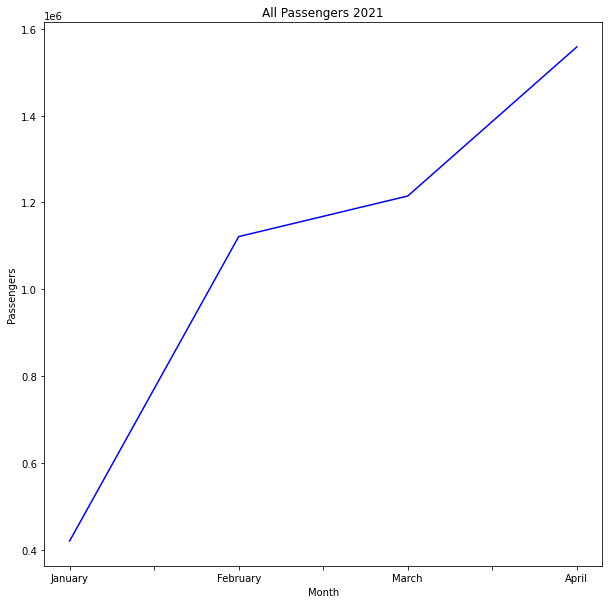

In [158]:
plt.figure(figsize=(10,10))
ax = df_pass["Passengers"].plot(color=['blue'])
plt.title('All Passengers 2021')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

In [159]:
company_april = pd.read_csv('final_company_apr.csv')
company_january = pd.read_csv('final_company_jan.csv')
company_february = pd.read_csv('final_company_feb.csv')
company_march = pd.read_csv('final_company_mrch.csv')
company_april

,Unnamed: 0,Passengers_P,Passengers,Company
0,2,22.21%,"865,072",EL AL ISRAEL AIRLINES
1,3,9.13%,"355,519",RYANAIR
2,4,7.00%,"272,847",TURKISH AIRLINES
3,5,5.42%,"211,420",EASYJET
4,6,4.75%,"184,997",WIZZAIR
...,...,...,...,...
77,16,NaN,157,CATHAY PACIFIC\rAIRWAYS
78,17,NaN,126,PRIVILEG STYLE
79,18,NaN,110,WIND ROSE AVIATION Co.\rLt
80,19,0.31%,"12,095",NaN


In [160]:
company_january['Passengers'] = company_january.Passengers.str.replace(',','')
company_january["Passengers"] = company_january["Passengers"].astype(str).astype(np.int64)
company_february['Passengers'] = company_february.Passengers.str.replace(',','')
company_february["Passengers"] = company_february["Passengers"].astype(str).astype(np.int64)
company_march['Passengers'] = company_march.Passengers.str.replace(',','')
company_march["Passengers"] = company_march["Passengers"].astype(str).astype(np.int64)
company_april['Passengers'] = company_april.Passengers.str.replace(',','')
company_april["Passengers"] = company_april["Passengers"].astype(str).astype(np.int64)
#country_january['Passengers'] = pd.to_numeric(country_january['Passengers'])
company_january

,Unnamed: 0,Passengers_P,Passengers,Company
0,1,21.30%,89575,EL AL ISRAEL AIRLINES
1,2,10.03%,42204,RYANAIR
2,3,6.77%,28505,TURKISH AIRLINES
3,4,6.05%,25471,UNITED AIRLINES
4,5,5.26%,22144,PEGASUS AIRLINES
5,6,4.59%,19310,WIZZAIR
6,7,4.10%,17246,ISRAIR AIRLINES
7,8,3.88%,16334,UKRAINE INTL AIR
8,9,3.68%,15489,LUFTHANSA
9,10,2.81%,11825,FLYDUBAI


In [162]:
Total_jan_comp = company_january['Passengers'].sum()
Total_feb_comp = company_february['Passengers'].sum()
Total_mrch_comp = company_march['Passengers'].sum()
Total_apr_comp = company_april['Passengers'].sum()
data = [['January', Total_jan_comp], ['February', Total_feb_comp], ['March', Total_mrch_comp], ['April', Total_apr_comp]]
df_pass_comp = pd.DataFrame(data, columns=['Month', 'Passengers'])
df_pass_comp = df_pass_comp.set_index('Month')
df_pass_comp

,Passengers
Month,
January,840876
February,1121267
March,2327822
April,7787780


Here we will present a graph of all passengers by airline and we will see the increase in passengers during the first four months of 2022

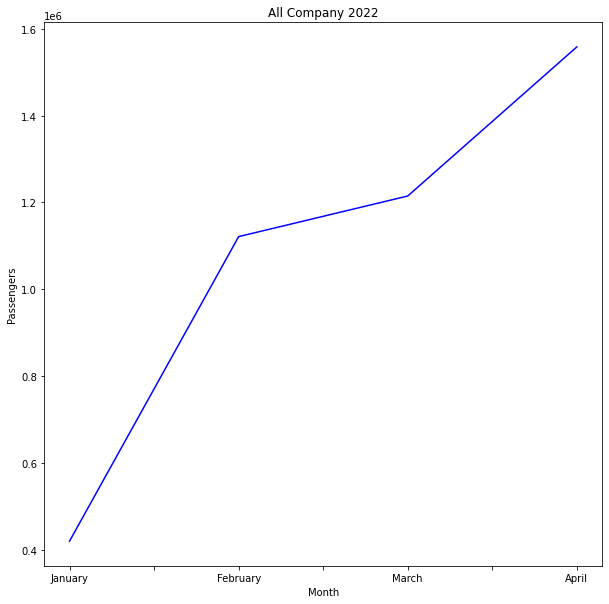

In [163]:
plt.figure(figsize=(10,10))
ax = df_pass["Passengers"].plot(color=['blue'])
plt.title('All Company 2022')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

In [166]:
data_elal = {
   'January': company_january.loc[company_january.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist(),
      'February': company_february.loc[company_february.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist(),
      'March': company_march.loc[company_march.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist(),
    'April': company_april.loc[company_april.Company == 'EL AL ISRAEL AIRLINES','Passengers'].tolist()
}
elal_passengers = pd.DataFrame(data_elal)
elal_passengers = elal_passengers.rename(index={0: 'Passengers'})
elal_passengers = elal_passengers.T
elal_passengers

,Passengers
January,89575
February,232229
March,522179
April,865072


In [168]:
data_turkish = {
   'January': company_january.loc[company_january.Company == 'TURKISH AIRLINES','Passengers'].tolist(),
      'February': company_february.loc[company_february.Company == 'TURKISH AIRLINES','Passengers'].tolist(),
      'March': company_march.loc[company_march.Company == 'TURKISH AIRLINES','Passengers'].tolist(),
    'April': company_april.loc[company_april.Company == 'TURKISH AIRLINES','Passengers'].tolist()
}
turkish_passengers = pd.DataFrame(data_turkish)
turkish_passengers = turkish_passengers.rename(index={0: 'Passengers'})
turkish_passengers =  turkish_passengers.T
turkish_passengers

,Passengers
January,28505
February,82150
March,166446
April,272847


In [169]:
data_uk = {
   'January': country_january.loc[country_january.Country == 'UNITED KINGDOM','Passengers'].tolist(),
      'February': country_february.loc[country_february.Country == 'UNITED KINGDOM','Passengers'].tolist(),
      'March': country_march.loc[country_march.Country == 'UNITED KINGDOM','Passengers'].tolist(),
    'April': country_april.loc[country_april.Country == 'UNITED KINGDOM','Passengers'].tolist()
}
uk_passengers = pd.DataFrame(data_uk)
uk_passengers = uk_passengers.rename(index={0: 'Passengers'})
uk_passengers = uk_passengers.T
uk_passengers

,Passengers
January,15570
February,56639
March,72279
April,101382


In [170]:
data_usa = {
   'January': country_january.loc[country_january.Country == 'UNITED STATES','Passengers'].tolist(),
      'February': country_february.loc[country_february.Country == 'UNITED STATES','Passengers'].tolist(),
      'March': country_march.loc[country_march.Country == 'UNITED STATES','Passengers'].tolist(),
    'April': country_april.loc[country_april.Country == 'UNITED STATES','Passengers'].tolist()
}
usa_passengers = pd.DataFrame(data_usa)
usa_passengers = usa_passengers.rename(index={0: 'Passengers'})
usa_passengers = usa_passengers.T
usa_passengers

,Passengers
January,67021
February,158042
March,138965
April,157853


Here we represent a graph of all passengers to the USA in relation to all passengers during the first four months of 2022

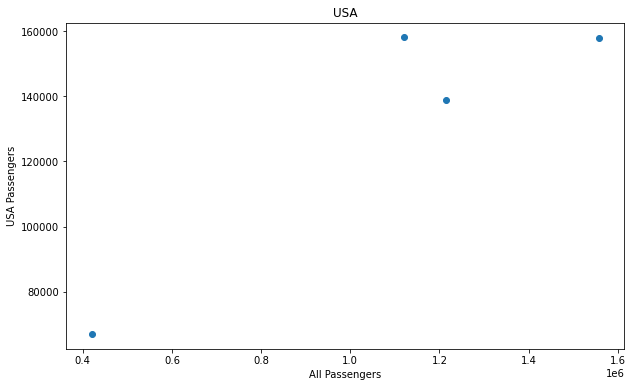

In [172]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_pass.Passengers, usa_passengers.Passengers)
plt.xlabel('All Passengers')
plt.ylabel('USA Passengers')
plt.title("USA")
plt.show()

Here we represent a graph of all passengers for EL AL in relation to all passengers during the first four months of 2022

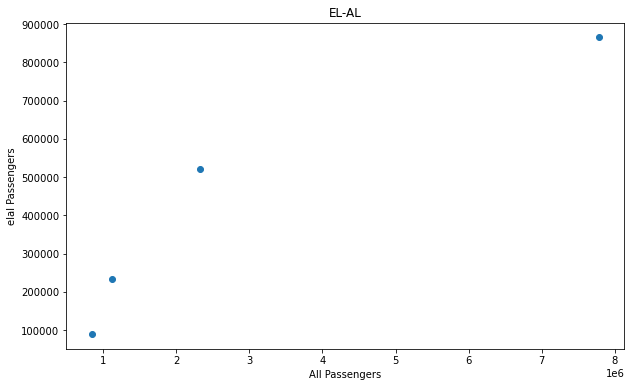

In [173]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_pass_comp.Passengers, elal_passengers.Passengers)
plt.xlabel('All Passengers')
plt.ylabel('elal Passengers')
plt.title("EL-AL")
plt.show()

Here we represent a graph of all passengers to the UK in relation to all passengers during the first four months of 2022

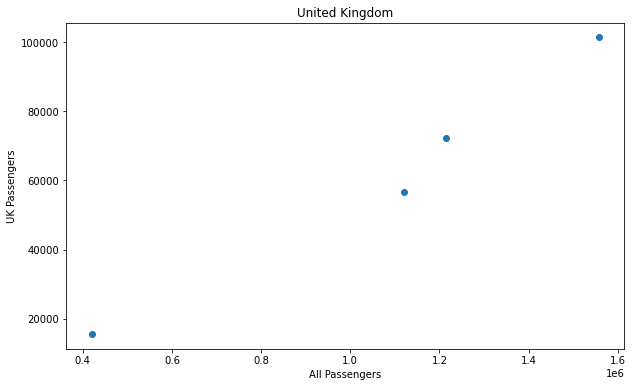

In [174]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_pass.Passengers, uk_passengers.Passengers)
plt.xlabel('All Passengers')
plt.ylabel('UK Passengers')
plt.title("United Kingdom")
plt.show()

Here is a graph of the total number of passengers for Turkish Airlines in relation to all passengers during the first four months of 2022

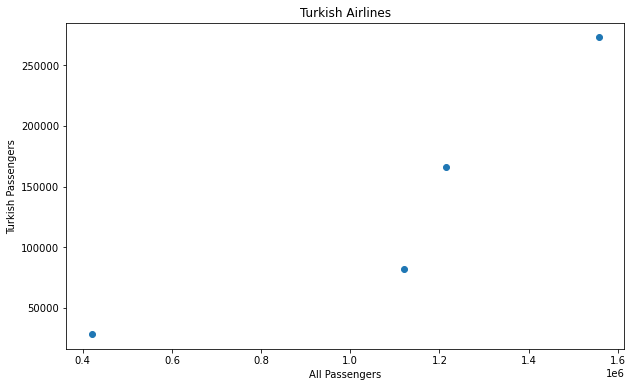

In [175]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(df_pass.Passengers, turkish_passengers.Passengers)
plt.xlabel('All Passengers')
plt.ylabel('Turkish Passengers')
plt.title("Turkish Airlines")
plt.show()

LinearRegression_SupervisedLearning_Passengers

I will present here two options for constructing a linear regression for predicting the number of passengers in the following months

We will import libraries and packages that help us use machine learning to build the linear regression

In [113]:
from sklearn import linear_model



import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

We predicted the dataframes we would work with to build the linear regression

In [114]:
df_country = pd.read_csv('df_country.csv')
df_company = pd.read_csv('df_company.csv')
df_country = df_country.drop(['Unnamed: 0'], axis=1)
df_company = df_company.drop(['Unnamed: 0'], axis=1)
df_country

,January,February,March,April,All
0,67021,158042,152909,190604,568576
1,51530,149410,138965,157853,497758
2,24959,83809,103996,107397,320161
3,24835,76280,85812,104530,291457
4,22591,66801,85024,102506,276922
5,21575,58295,79496,101382,260748
6,17421,56639,72279,97178,243517
7,16961,39742,39124,95012,190839
8,15570,37087,38838,51879,143374
9,15330,35415,37591,51674,140010


Here is a point graph of all passengers as a function of the first four months of 2022 by countries

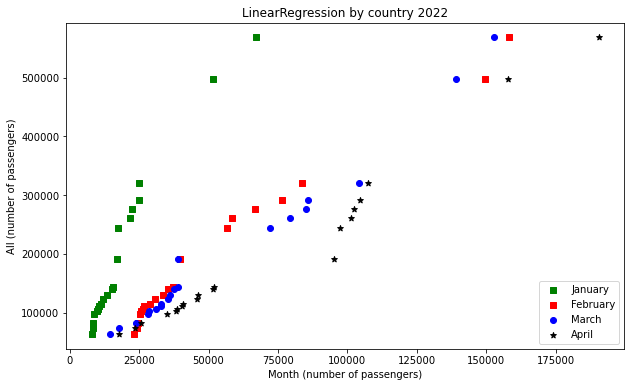

In [115]:
plt.scatter(x=df_country['January'],y=df_country['All'],c='g',marker='s',label='January')
plt.scatter(x=df_country['February'],y=df_country['All'],c='r',marker='s',label='February')
plt.scatter(x=df_country['March'],y=df_country['All'],c='b',marker='o',label='March')
plt.scatter(x=df_country['April'],y=df_country['All'],c='k',marker='*',label='April')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Month (number of passengers)')
plt.ylabel('All (number of passengers)')
plt.title('LinearRegression by country 2022')
plt.show()

Here is a point graph of all passengers as a function of the first four months of 2022 by Airlines

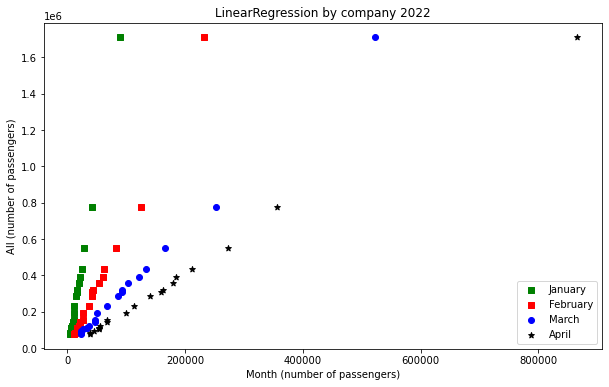

In [116]:
plt.scatter(x=df_company['January'],y=df_company['All'],c='g',marker='s',label='January')
plt.scatter(x=df_company['February'],y=df_company['All'],c='r',marker='s',label='February')
plt.scatter(x=df_company['March'],y=df_company['All'],c='b',marker='o',label='March')
plt.scatter(x=df_company['April'],y=df_company['All'],c='k',marker='*',label='April')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Month (number of passengers)')
plt.ylabel('All (number of passengers)')
plt.title('LinearRegression by company 2022')
plt.show()

In [117]:
df_country.describe()

,January,February,March,April,All
count,20.000000,20.000000,20.000000,20.000000,20.00000
mean,18932.400000,51519.900000,55741.550000,70595.050000,196788.90000
std,15059.749678,39507.782081,39941.214692,46948.807335,139376.02926
min,7978.000000,23077.000000,14648.000000,17815.000000,63518.00000
25%,9973.500000,26280.000000,30284.000000,38608.500000,105146.00000
50%,14470.500000,34462.500000,36789.500000,48855.500000,134578.00000
75%,21829.000000,60421.500000,80878.000000,101663.000000,264791.50000
max,67021.000000,158042.000000,152909.000000,190604.000000,568576.00000


COUNTRY

We will build the regression for the table of countries and it will start training

In [118]:
j=linear_model.LinearRegression().fit(df_country.iloc[:,0:1],df_country.iloc[:,4:])

We will present the model construction as a linear function of the point graph relevant to that month

Linear regression of January by country

C:\Users\user\AppData\Local\Temp/ipykernel_7512/3769327684.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(df_country['January'],j.predict(df_country.iloc[:,0:1]),'k',color='c',linewidth=3)


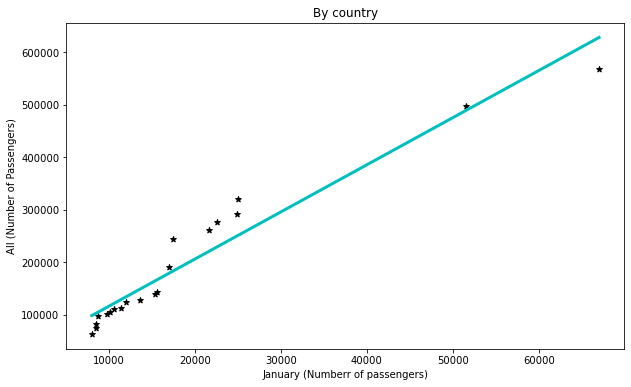

In [119]:
plt.scatter(x=df_country['January'],y=df_country['All'],c='k',marker='*',label='Digital')
plt.plot(df_country['January'],j.predict(df_country.iloc[:,0:1]),'k',color='c',linewidth=3)

plt.xlabel('January (Numberr of passengers)')
plt.ylabel('All (Number of Passengers)')
plt.title('By country')
plt.show()

We got here the coefficients of the linear equation

In [121]:
print("b1:",j.coef_)
print("b0:",j.intercept_)

b1: [[8.96691403]]
b0: [27023.69677479]


Calculating the SSE value

In [120]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(df_country.All.tolist(),j.predict(df_country.iloc[:,0:1]).flatten())

print(SSE)

22610307459.662117


In [134]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_country.All.tolist(),j.predict(df_country.iloc[:,0:1]).flatten())*len(df_country.All.tolist())

22610307459.662113

Calculate the R coefficient that will help us in predicting

In [135]:
from sklearn.metrics import r2_score

r2_score(df_country.All.tolist(),j.predict(df_country.iloc[:,0:1]).flatten())

0.9387400423941502

Linear regression of Fabruary by country

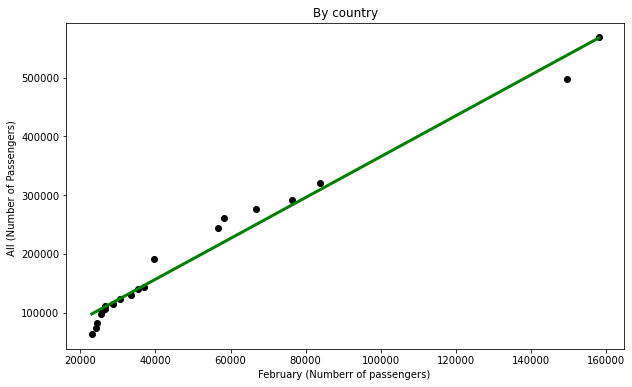

Slope: [[3.4858676]]
Intercept: [17197.35003131]
R2: 0.976362068014812


In [122]:
lr_February = linear_model.LinearRegression() # create a linear regression object
 
x = df_country['February'].values.reshape(df_country['February'].shape[0],1)
y = df_country['All'].values.reshape(df_country['All'].shape[0],1)

lr_February.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_February.predict(x), color='g', linewidth=3)

plt.xlabel('February (Numberr of passengers) ')
plt.ylabel('All (Number of Passengers) ')
plt.title('By country')
plt.show()

print("Slope:",lr_February.coef_)
print("Intercept:",lr_February.intercept_)
print("R2:",lr_February.score(x,y))

Linear regression of March by country

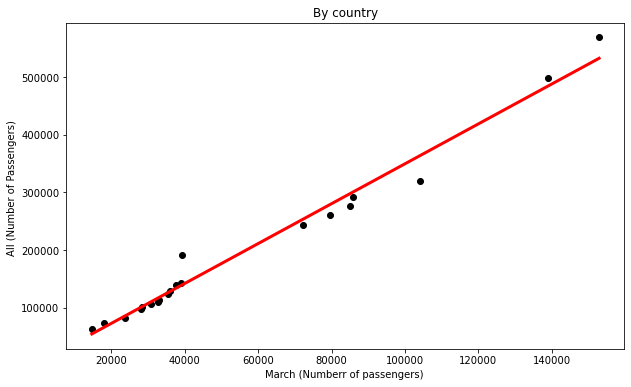

Slope: [[3.45483723]]
Intercept: [4210.91779297]
R2: 0.9802154508611438


In [123]:
lr_March = linear_model.LinearRegression() # create a linear regression object
 
x = df_country['March'].values.reshape(df_country['March'].shape[0],1)
y = df_country['All'].values.reshape(df_country['All'].shape[0],1)

lr_March.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_March.predict(x), color='r', linewidth=3)

plt.xlabel('March (Numberr of passengers) ')
plt.ylabel('All (Number of Passengers) ')
plt.title('By country')
plt.show()

print("Slope:",lr_March.coef_)
print("Intercept:",lr_March.intercept_)
print("R2:",lr_March.score(x,y))

Linear regression of April by country

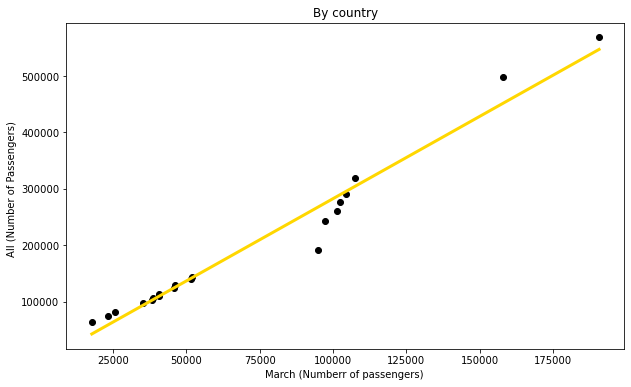

Slope: [[2.9215009]]
Intercept: [-9454.60205574]
R2: 0.9684673898288066


In [124]:
lr_April = linear_model.LinearRegression() # create a linear regression object
 
x = df_country['April'].values.reshape(df_country['April'].shape[0],1)
y = df_country['All'].values.reshape(df_country['All'].shape[0],1)

lr_April.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_April.predict(x), color='gold', linewidth=3)

plt.xlabel('March (Numberr of passengers) ')
plt.ylabel('All (Number of Passengers)  ')
plt.title('By country')
plt.show()

print("Slope:",lr_April.coef_)
print("Intercept:",lr_April.intercept_)
print("R2:",lr_April.score(x,y))

In [125]:
lr = linear_model.LinearRegression()

x = df_country[["January","February","March","April"]]
y = df_country['All']
lr.fit(X=x, y=y);

In [126]:
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)

Slope: [1. 1. 1. 1.]
Intercept: 2.9103830456733704e-11


An overview of the linear regressions by country

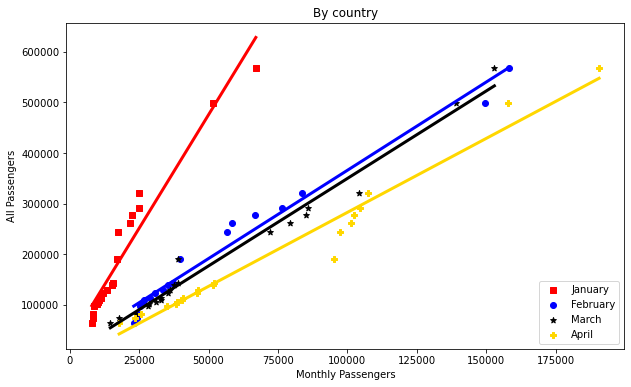

In [127]:
plt.scatter(x=df_country['January'],y=df_country['All'],c='r',marker='s',label='January')
plt.scatter(x=df_country['February'],y=df_country['All'],c='b',marker='o',label='February')
plt.scatter(x=df_country['March'],y=df_country['All'],c='k',marker='*',label='March')
plt.scatter(x=df_country['April'],y=df_country['All'],c='gold',marker='P',label='April')
plt.legend(numpoints=1,loc=4)

plt.plot(df_country['January'],j.predict(df_country['January'].values.reshape(df_country['January'].shape[0],1)),c='r',linewidth=3)
plt.plot(df_country['February'],lr_February.predict(df_country['February'].values.reshape(df_country['February'].shape[0],1)),c='b',linewidth=3)
plt.plot(df_country['March'],lr_March.predict(df_country['March'].values.reshape(df_country['March'].shape[0],1)),c='k',linewidth=3)
plt.plot(df_country['April'],lr_April.predict(df_country['April'].values.reshape(df_country['April'].shape[0],1)),c='gold',linewidth=3)

plt.xlabel('Monthly Passengers')
plt.ylabel('All Passengers')
plt.title('By country')
plt.show()

In [128]:
lr = linear_model.LinearRegression() 

x = df_country[['January',"February","March","April"]]
y = df_country['All']
lr.fit(X=x, y=y);

In [129]:
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)

Slope: [1. 1. 1. 1.]
Intercept: 2.9103830456733704e-11


In [136]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x.values)))

R2: 1.0
R2: 1.0


COMPANY

Linear regression of January by company

In [137]:
j=linear_model.LinearRegression().fit(df_company.iloc[:,0:1],df_company.iloc[:,4:])

C:\Users\user\AppData\Local\Temp/ipykernel_7512/912518902.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(df_company['January'],j.predict(df_company.iloc[:,0:1]),'k',color='c',linewidth=3)


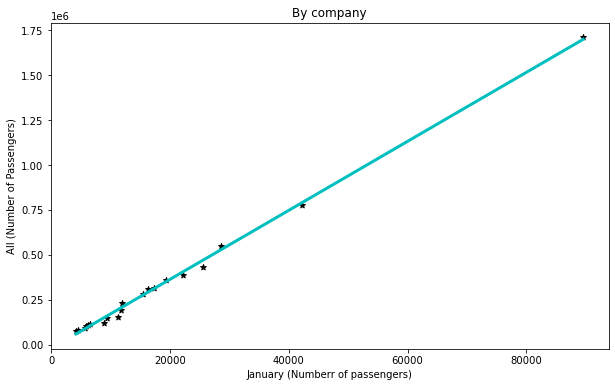

In [138]:
plt.scatter(x=df_company['January'],y=df_company['All'],c='k',marker='*',label='Digital')
plt.plot(df_company['January'],j.predict(df_company.iloc[:,0:1]),'k',color='c',linewidth=3)

plt.xlabel('January (Numberr of passengers)')
plt.ylabel('All (Number of Passengers)')
plt.title('By company')
plt.show()

In [139]:
def sse(Y, Y_HAT):  
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(df_company.All.tolist(),j.predict(df_company.iloc[:,0:1]).flatten())

print(SSE)

6858452996.848132


In [148]:
mean_squared_error(df_company.All.tolist(),j.predict(df_company.iloc[:,0:1]).flatten())*len(df_company.All.tolist())

6858452996.848133

In [149]:
r2_score(df_company.All.tolist(),j.predict(df_company.iloc[:,0:1]).flatten())

0.9973937362799902

In [140]:
print("b1:",j.coef_)
print("b0:",j.intercept_)

b1: [[19.18307728]]
b0: [-19588.68969443]


Linear regression of Fabruary by company

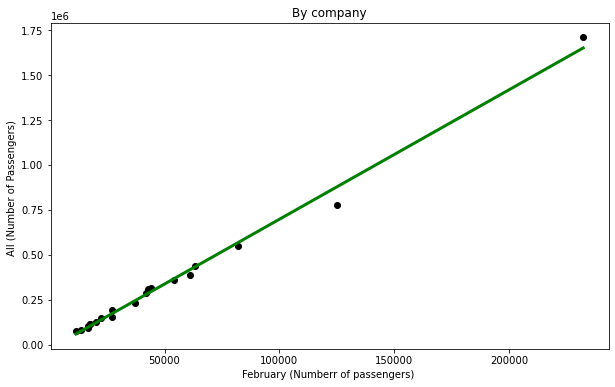

Slope: [[7.21023596]]
Intercept: [-23789.15105967]
R2: 0.9932097552334844


In [141]:
lr_February = linear_model.LinearRegression() # create a linear regression object
 
x = df_company['February'].values.reshape(df_company['February'].shape[0],1)
y = df_company['All'].values.reshape(df_company['All'].shape[0],1)

lr_February.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_February.predict(x), color='g', linewidth=3)

plt.xlabel('February (Numberr of passengers) ')
plt.ylabel('All (Number of Passengers) ')
plt.title('By company')
plt.show()

print("Slope:",lr_February.coef_)
print("Intercept:",lr_February.intercept_)
print("R2:",lr_February.score(x,y))

Linear regression of March by company

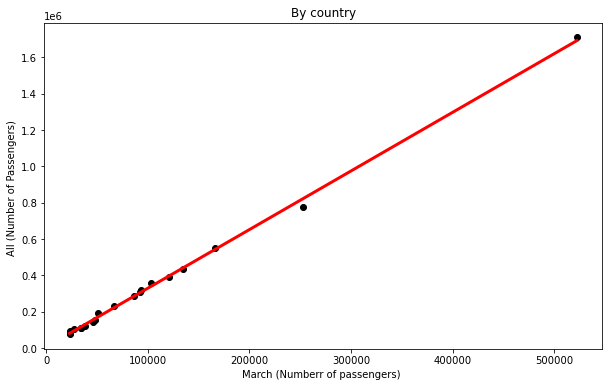

Slope: [[3.22706845]]
Intercept: [6434.89521119]
R2: 0.9985256913248522


In [142]:
lr_March = linear_model.LinearRegression() # create a linear regression object
 
x = df_company['March'].values.reshape(df_company['March'].shape[0],1)
y = df_company['All'].values.reshape(df_company['All'].shape[0],1)

lr_March.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_March.predict(x), color='r', linewidth=3)

plt.xlabel('March (Numberr of passengers) ')
plt.ylabel('All (Number of Passengers) ')
plt.title('By country')
plt.show()

print("Slope:",lr_March.coef_)
print("Intercept:",lr_March.intercept_)
print("R2:",lr_March.score(x,y))

Linear regression of April by company

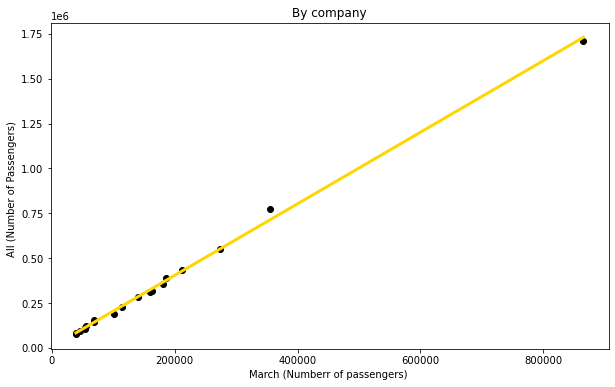

Slope: [[1.99252325]]
Intercept: [6317.1227875]
R2: 0.9979247949645415


In [143]:
lr_April = linear_model.LinearRegression() # create a linear regression object
 
x = df_company['April'].values.reshape(df_company['April'].shape[0],1)
y = df_company['All'].values.reshape(df_company['All'].shape[0],1)

lr_April.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_April.predict(x), color='gold', linewidth=3)

plt.xlabel('March (Numberr of passengers) ')
plt.ylabel('All (Number of Passengers)  ')
plt.title('By company')

plt.show()

print("Slope:",lr_April.coef_)
print("Intercept:",lr_April.intercept_)
print("R2:",lr_April.score(x,y))

An overview of the linear regressions by company

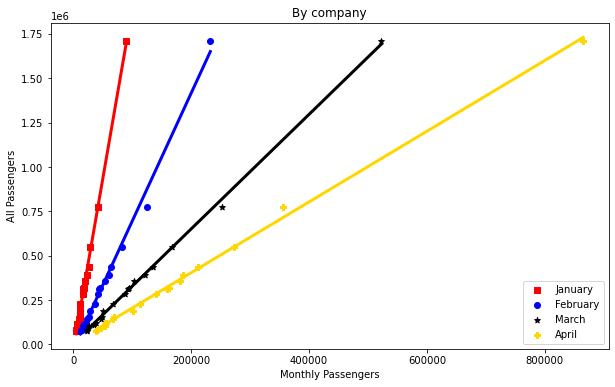

In [144]:
plt.scatter(x=df_company['January'],y=df_company['All'],c='r',marker='s',label='January')
plt.scatter(x=df_company['February'],y=df_company['All'],c='b',marker='o',label='February')
plt.scatter(x=df_company['March'],y=df_company['All'],c='k',marker='*',label='March')
plt.scatter(x=df_company['April'],y=df_company['All'],c='gold',marker='P',label='April')
plt.legend(numpoints=1,loc=4)

plt.plot(df_company['January'],j.predict(df_company['January'].values.reshape(df_company['January'].shape[0],1)),c='r',linewidth=3)
plt.plot(df_company['February'],lr_February.predict(df_company['February'].values.reshape(df_company['February'].shape[0],1)),c='b',linewidth=3)
plt.plot(df_company['March'],lr_March.predict(df_company['March'].values.reshape(df_country['March'].shape[0],1)),c='k',linewidth=3)
plt.plot(df_company['April'],lr_April.predict(df_company['April'].values.reshape(df_company['April'].shape[0],1)),c='gold',linewidth=3)

plt.xlabel('Monthly Passengers')
plt.ylabel('All Passengers')
plt.title('By company')
plt.show()

In [145]:
lr = linear_model.LinearRegression() 

x = df_country[['January',"February","March","April"]]
y = df_country['All']
lr.fit(X=x, y=y);

In [146]:
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)

Slope: [1. 1. 1. 1.]
Intercept: 2.9103830456733704e-11


In [147]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x.values)))

R2: 1.0
R2: 1.0
